# Autor: Daniel Oviedo

# Realizar un modelo predictivo para determinar la mejor forma de invertir el dinero, para aumentar las ventas de una empresa


# 1. (Machine Learning) Una empresa que fabrica electrodomésticos desea mejorar sus ganancias en el próximo año. Actualmente, la empresa invierte en medios publicitarios como televisión, radio y periódicos. La empresa registra el dinero invertido en cada medio publicitario (en miles de dólares) y la cantidad de unidades de producto vendidas (en miles de unidades). Usted es contratado como consultor y tiene la misión de construir un modelo predictivo que le ayude a la empresa a determinar la forma más eficaz de invertir el dinero en publicidad de tal manera que se logre un incrementó en las ventas. Para esta tarea la empresa le suministra los datos disponibles en [https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/advertising2.csv]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Entrenamiento
from sklearn.model_selection import train_test_split
# Transformacion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Modelos
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import itertools
from sklearn.neighbors import KNeighborsRegressor
# Statsmodels
import statsmodels.api as sm


raw = "https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/advertising2.csv"

## Preparación de los datos

In [ ]:
df = pd.read_csv(raw)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      208 non-null    object 
dtypes: float64(3), object(1)
memory usage: 6.6+ KB


In [ ]:
df['Sales'] = df['Sales'].str.replace(',', '.')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      208 non-null    float64
dtypes: float64(4)
memory usage: 6.6 KB


In [ ]:
df.isna().sum()

,0
TV,8
Radio,8
Newspaper,8
Sales,0


In [ ]:
# NO tocar test
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
print("80% de los datos (train)\n",train.isna().sum(),"\n")
print("20% de los datos (test)\n",test.isna().sum())

80% de los datos (train)
 TV           8
Radio        8
Newspaper    8
Sales        0
dtype: int64 

20% de los datos (test)
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


## Analisis Descriptivo

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,208.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.180782
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.225000
50%,149.750000,22.900000,25.750000,15.500000
75%,218.825000,36.525000,45.100000,18.900000
max,296.400000,49.600000,114.000000,27.000000


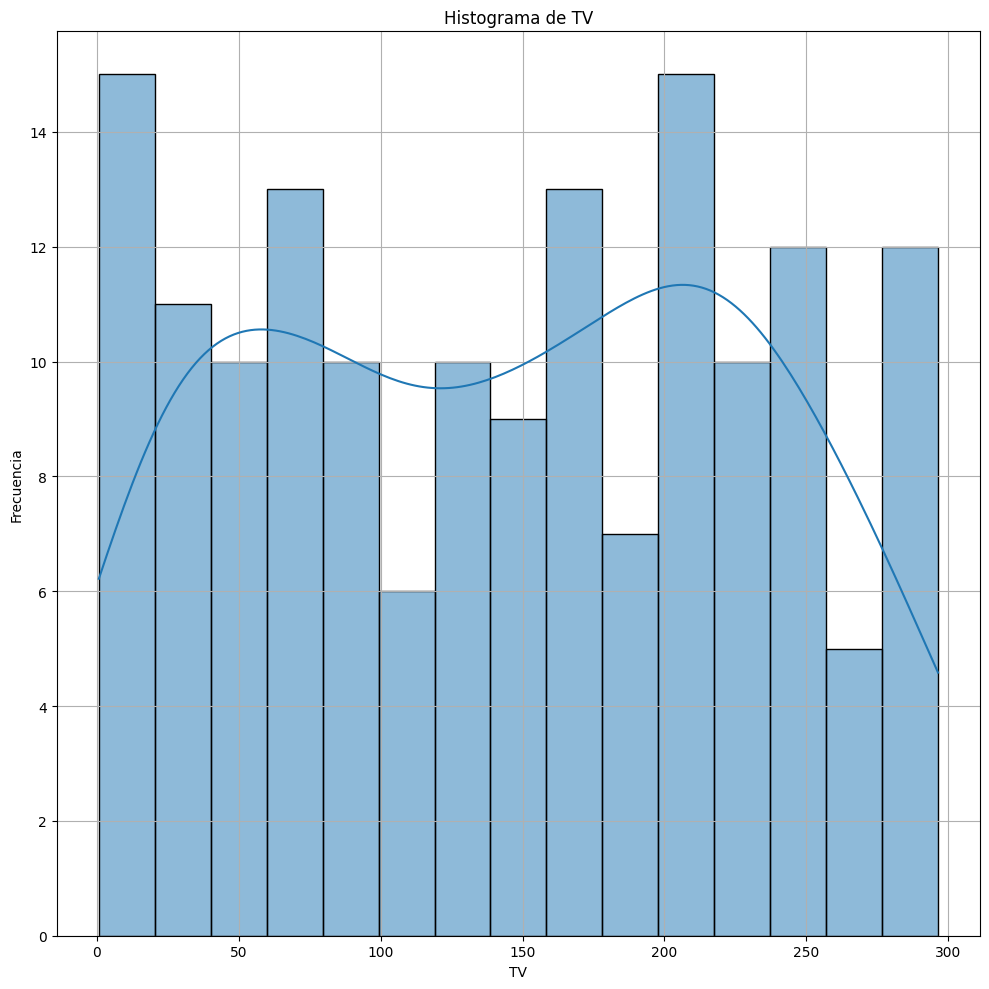

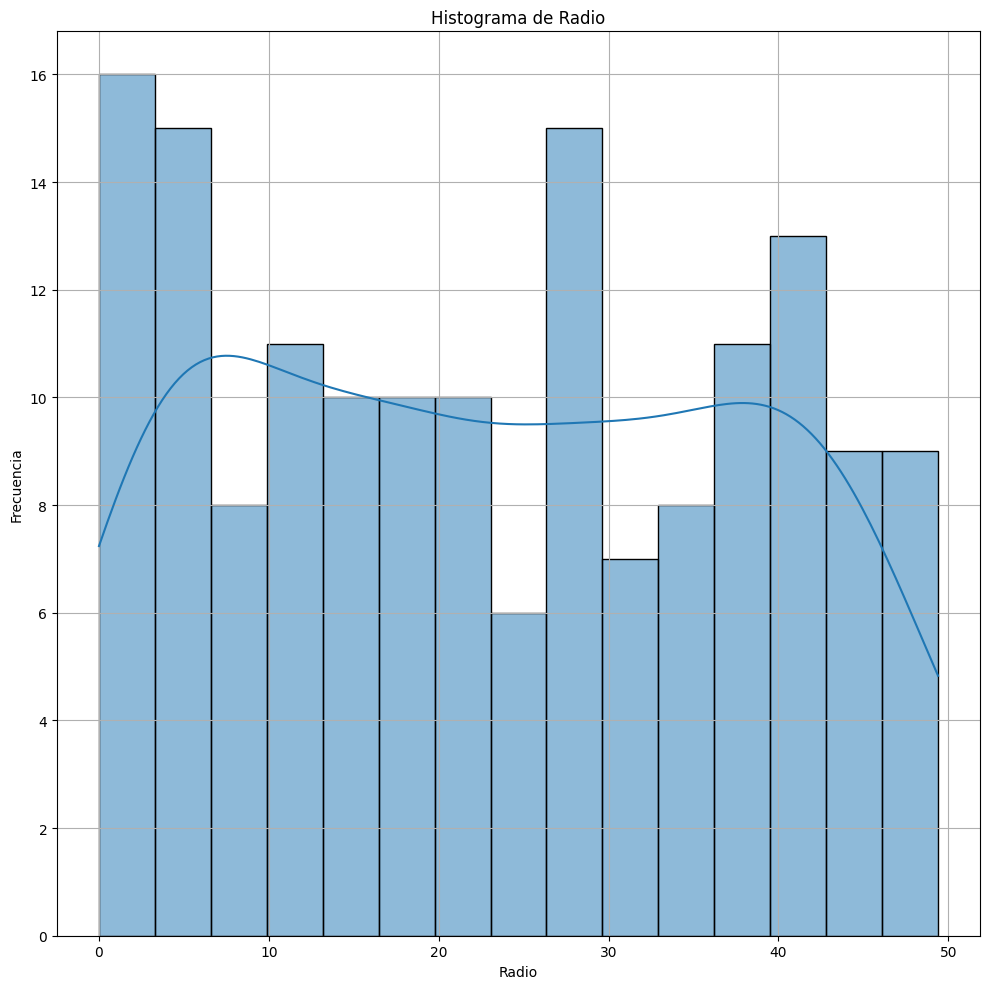

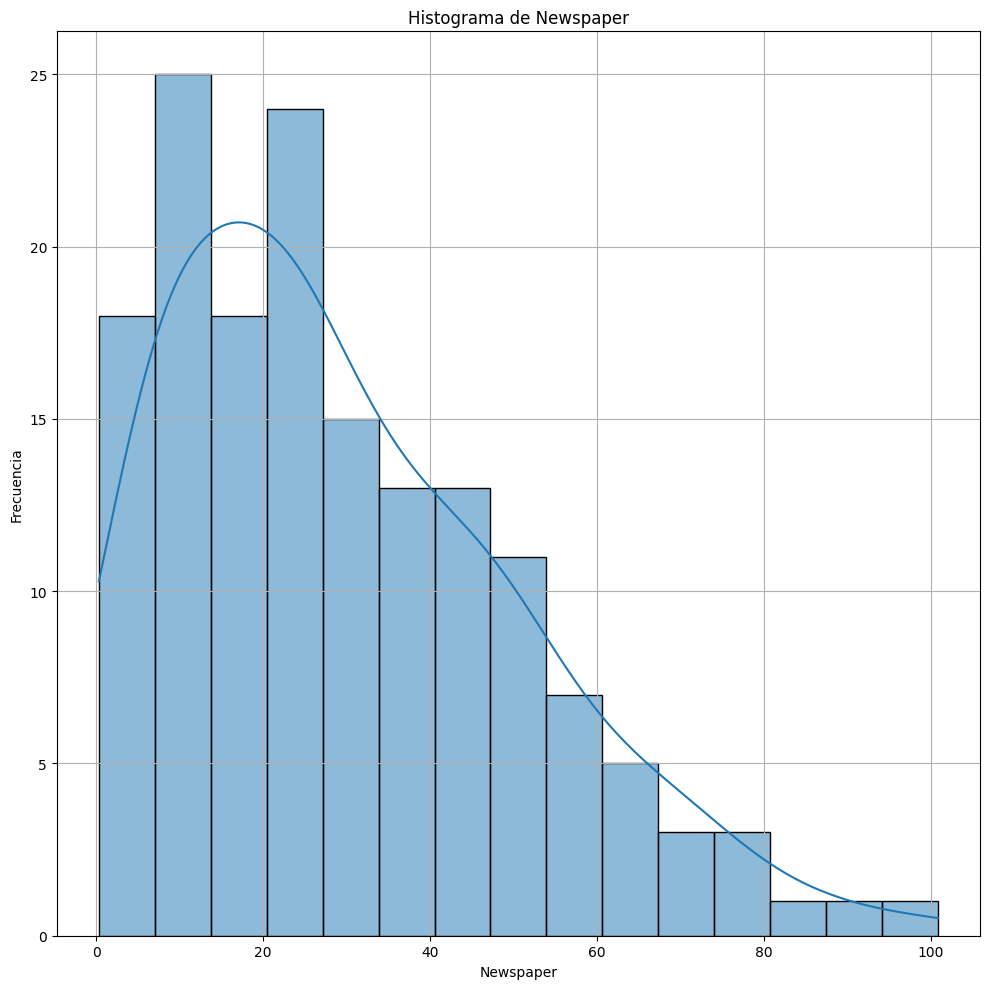

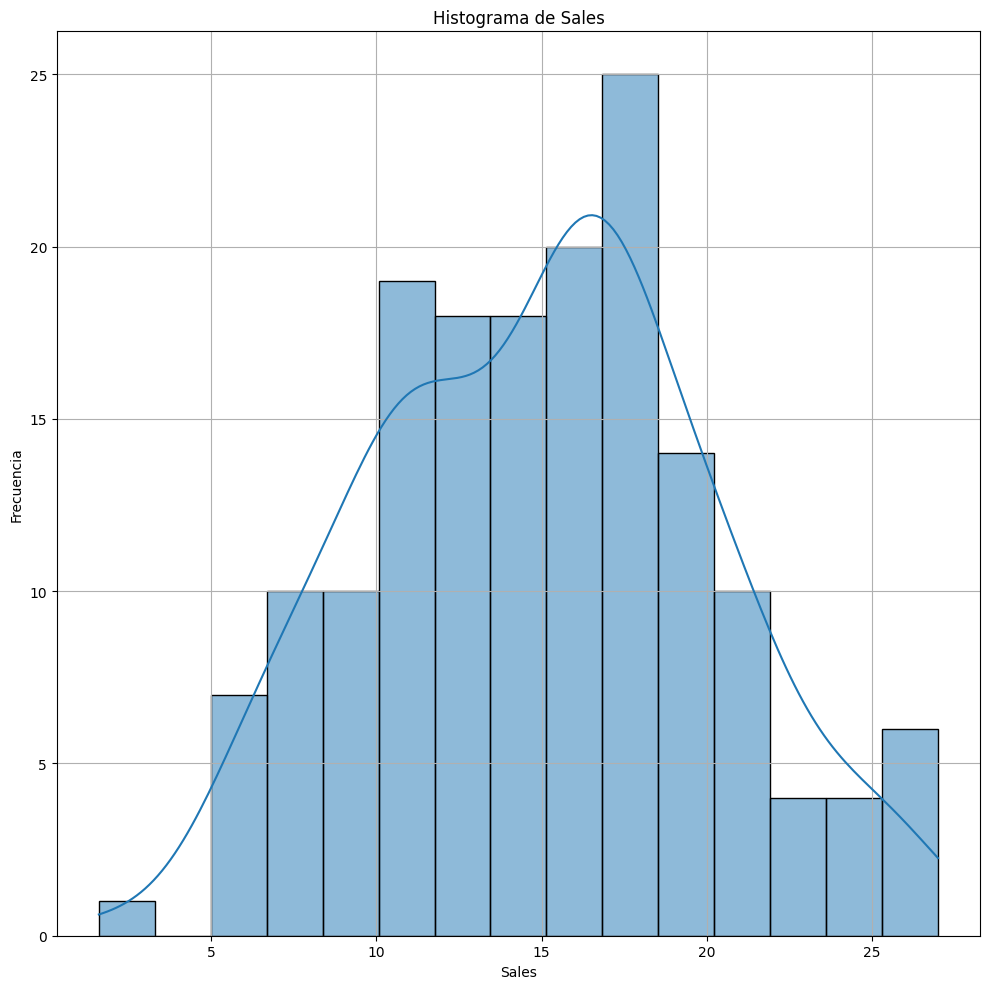

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(train['TV'], kde=True, bins=15)
plt.title('Histograma de TV')
plt.xlabel('TV')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(train['Radio'], kde=True, bins=15)
plt.title('Histograma de Radio')
plt.xlabel('Radio')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(train['Newspaper'], kde=True, bins=15)
plt.title('Histograma de Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,10))
sns.histplot(train['Sales'], kde=True, bins=15)
plt.title('Histograma de Sales')
plt.xlabel('Sales')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.grid(True)
plt.show()

*

<Figure size 1000x600 with 0 Axes>

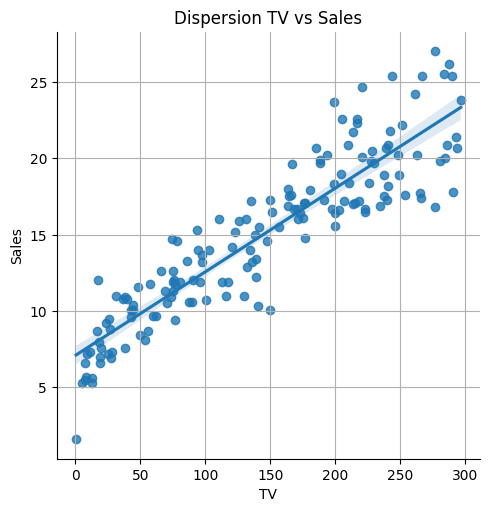

<Figure size 1000x600 with 0 Axes>

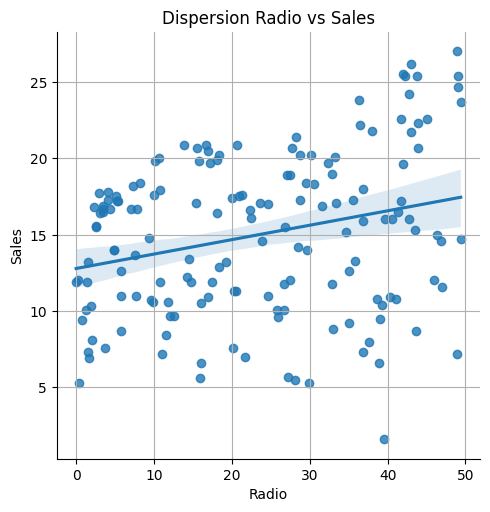

<Figure size 1000x600 with 0 Axes>

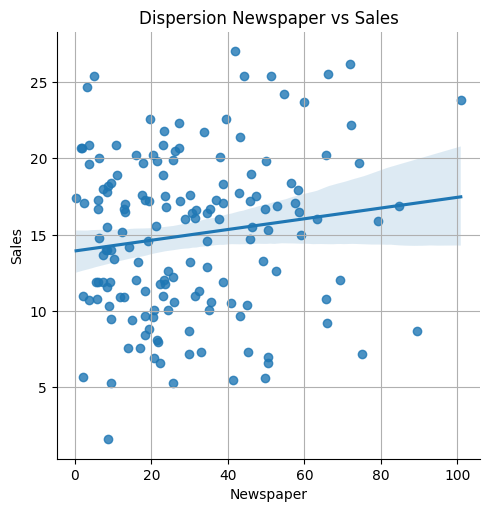

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='TV', y='Sales', data=train)
plt.title('Dispersion TV vs Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.lmplot(x='Radio', y='Sales', data=train)
plt.title('Dispersion Radio vs Sales')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.lmplot(x='Newspaper', y='Sales', data=train)
plt.title('Dispersion Newspaper vs Sales')
plt.grid(True)
plt.show()

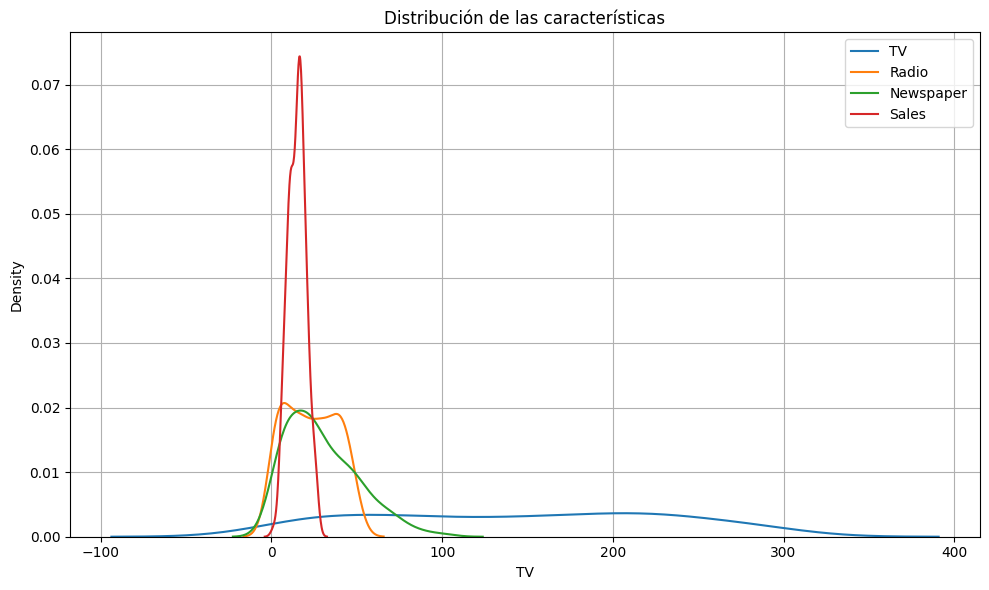

In [ ]:
plt.figure(figsize=(10, 6))
for col in ['TV', 'Radio', 'Newspaper', 'Sales']:
    sns.kdeplot(train[col], label=col)
plt.legend()
plt.title("Distribución de las características")
plt.tight_layout()
plt.grid(True)
plt.show()


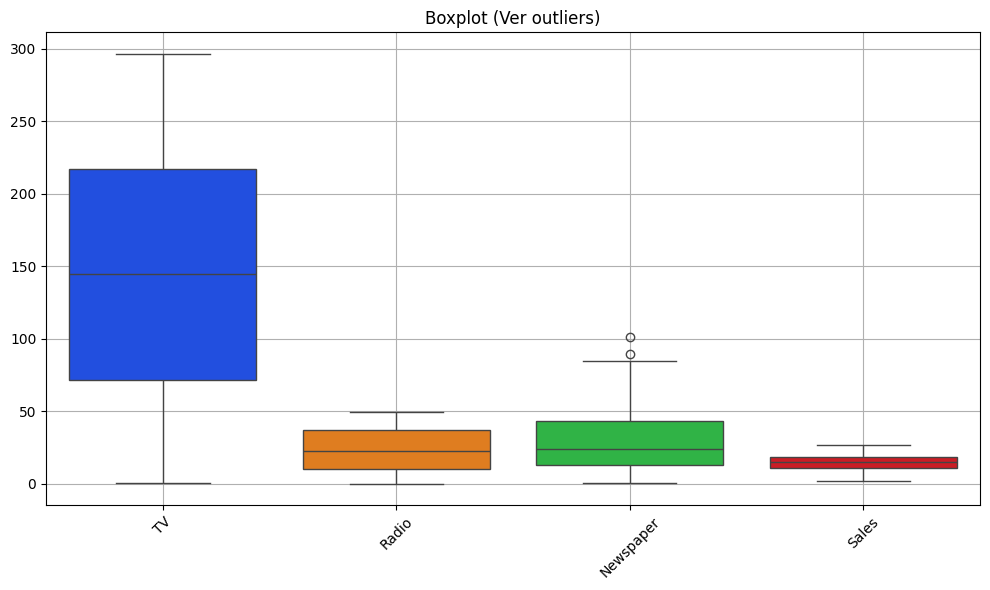

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train, palette='bright')
plt.title('Boxplot (Ver outliers)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
antesIQR = train.describe()

In [ ]:
Q1 = train[['TV', 'Radio', 'Newspaper', 'Sales']].quantile(0.25)
Q3 = train[['TV', 'Radio', 'Newspaper', 'Sales']].quantile(0.75)
IQR = Q3 - Q1

trained = train[~((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).any(axis=1)]

despuesIQR = trained.describe()

In [ ]:
print("Antes de IQR:\n", antesIQR)
print("\nDespués de IQR:\n", despuesIQR)

Antes de IQR:
                TV       Radio   Newspaper       Sales
count  158.000000  158.000000  158.000000  166.000000
mean   143.963924   23.209494   29.702532   14.984602
std     86.664688   14.976456   20.996217    5.109538
min      0.700000    0.000000    0.300000    1.600000
25%     71.300000    9.925000   12.825000   11.000000
50%    144.300000   22.400000   24.250000   15.165250
75%    216.700000   36.725000   43.175000   18.150000
max    296.400000   49.400000  100.900000   27.000000

Después de IQR:
                TV       Radio   Newspaper       Sales
count  156.000000  156.000000  156.000000  164.000000
mean   143.801282   22.994231   28.863462   14.969171
std     85.753002   14.944142   19.751580    5.070346
min      0.700000    0.000000    0.300000    1.600000
25%     72.700000    9.825000   12.700000   11.000000
50%    144.300000   22.000000   23.950000   15.165250
75%    216.500000   36.575000   43.025000   18.050000
max    293.600000   49.400000   84.800000   27.00

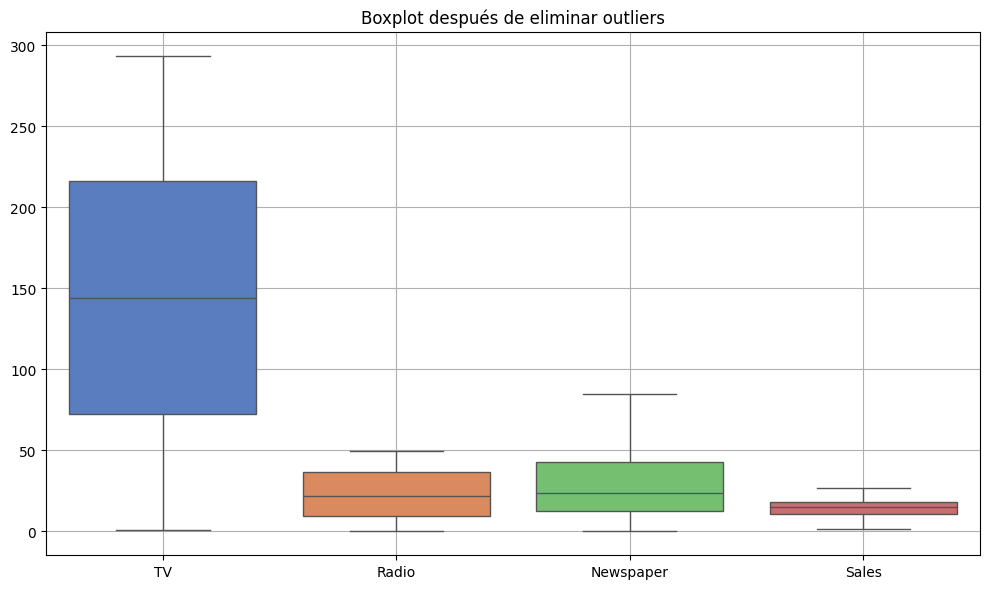

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=trained, palette="muted")
plt.title("Boxplot después de eliminar outliers")
plt.tight_layout()
plt.grid(True)
plt.show()

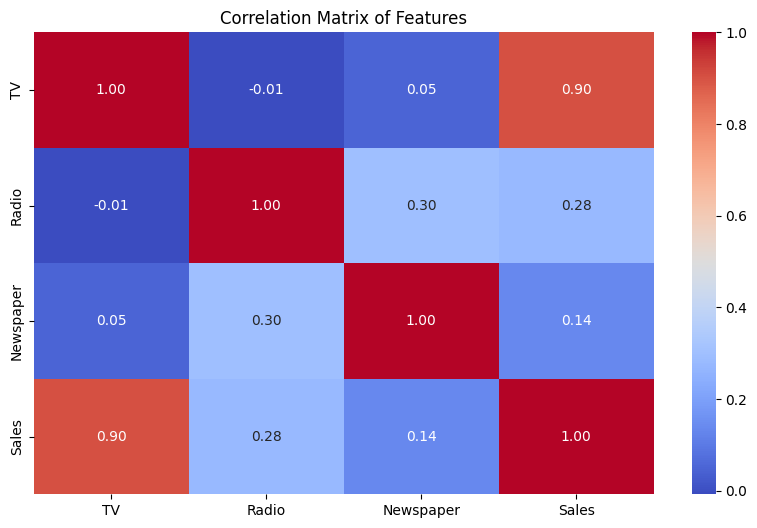

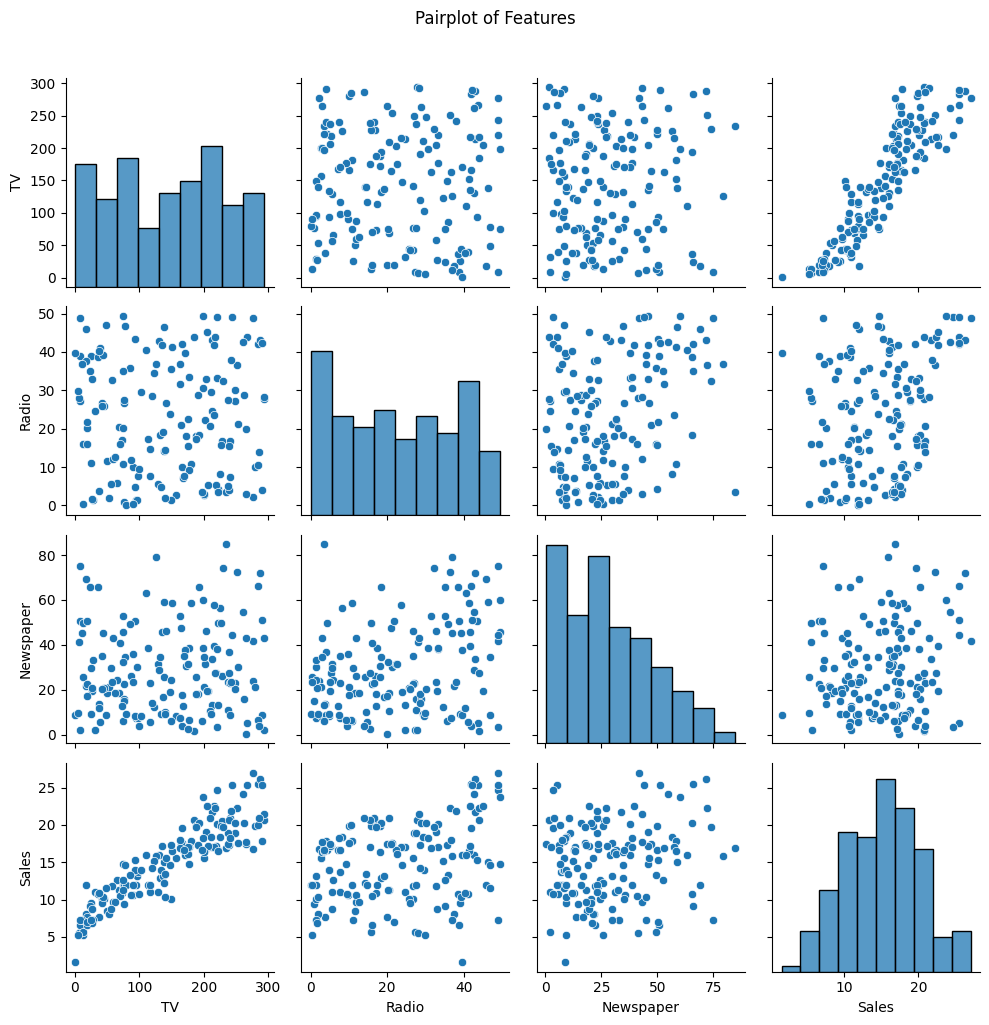

In [ ]:
correlation_matrix = trained.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

sns.pairplot(trained)
plt.suptitle('Pairplot of Features', y=1.02)
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
covariance_matrix = trained.cov()
print("Matriz de Covarianza:")
print(covariance_matrix)

Matriz de Covarianza:
                    TV       Radio   Newspaper       Sales
TV         7353.577289   -9.567476   81.118628  403.150438
Radio        -9.567476  223.327386   88.228433   21.532483
Newspaper    81.118628   88.228433  390.124914   14.028627
Sales       403.150438   21.532483   14.028627   25.708407


* Teoricamente, los valores que cuentan con una menor varianza, se encuentran menor distribuidos sus datos, asi mismo ocurre inversamente, cuanto mayor es la varianza, mayor sera la distancia y dipsersion de los datos.

* Todas las relación poseen una covarianza postivia, exceptuando la relación entre **Radio** y **TV**, esto sugiere que hay una tendencia ligera (puesto que el valor no es muy grande negativamente), a que si el gasto en inversión aumenta para **TV** disminuye para **Radio** y viceversa.

* En cuanto a las relaciones entre los gastos de publicidad positivas, (**TV, Newspaper** y **Radio, Newspaper**) indica que tienen una relación directamente proporcional, en donde si una aumenta, la otra aumentará (la medida depende de que tanta covarianza poseen, entre mayor la covarianza, mayor aumento habra en ambas variables).


* Considerando los valores de correlación, las variables que mayor influencia pueden tener sobre el modelo son 'Sales' y 'Radio', viendo la matriz de correlación.

* Por otro lado, la matriz de covarianza, sugiere que TV puede llegar a ser el predictor más fuerte en cuanto a ventas, por lo que podria ser un mejor lugar para invertir y generar ventas.

* La idea principal es buscar ventas 'Sales', sesto sugiere que, se deberia esperar que a mayor inversión en publicidad, mayor numero de ventas deberian de haber. La publicidad que genera esta relación es **TV** en donde se ve una relación directamente proporcional con respecto a las ventas que hay. **Radio** y **Newspaper** tienden a variar positivamente, no obstante, aportan una menor relación en cuanto al numero de ventas.

* Combinar modelos puede ser una buena idea, si se tiene en cuenta cuales trabajan bien juntos. **TV** y **Radio** no son la mejor opción para trabajar de la mano, estos poseen una covarianza negativa, lo que indica que si se invierte en ambas características, podria no ser la mejor opción para generar ventas. Por otro lado, **Radio** y **Newspaper** generan una buena relación entre ambas, siendo una buena idea de invertir en ambas, si se quiere generar una buena cantidad de ventas, no obstante, la mejor inversión para generar ventas sera **TV**

## Generar el modelo


In [ ]:
trained.isna().sum()

,0
TV,8
Radio,8
Newspaper,8
Sales,0


In [ ]:
pipelineStandard = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

pipelineMinMax = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

pipelineGod = Pipeline([
    ('preprocessing', ColumnTransformer([
        ('numerica', pipelineMinMax, ['TV']),
        ('numericaNormal', pipelineStandard, ['Radio', 'Newspaper'])
    ], remainder='passthrough'))
])
pipelineGod

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerica',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TV']),
                                                 ('numericaNormal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Radio', 'Newspaper'])]))])

In [ ]:
trainT = pipelineGod.fit_transform(trained)

In [ ]:
trainTdf = pd.DataFrame(trainT, columns=train.columns)
trainSm = trainTdf.copy() # Para el punto 2

trainTdf.head()

,TV,Radio,Newspaper,Sales
0,0.726528,1.380209,0.269159,21.7
1,0.303858,-0.897855,0.367957,10.6
2,0.864117,-0.113265,0.071562,17.6
3,0.439399,-1.186915,0.139161,11.0
4,0.847047,0.285912,-0.297631,18.9


In [ ]:
trainTdf.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


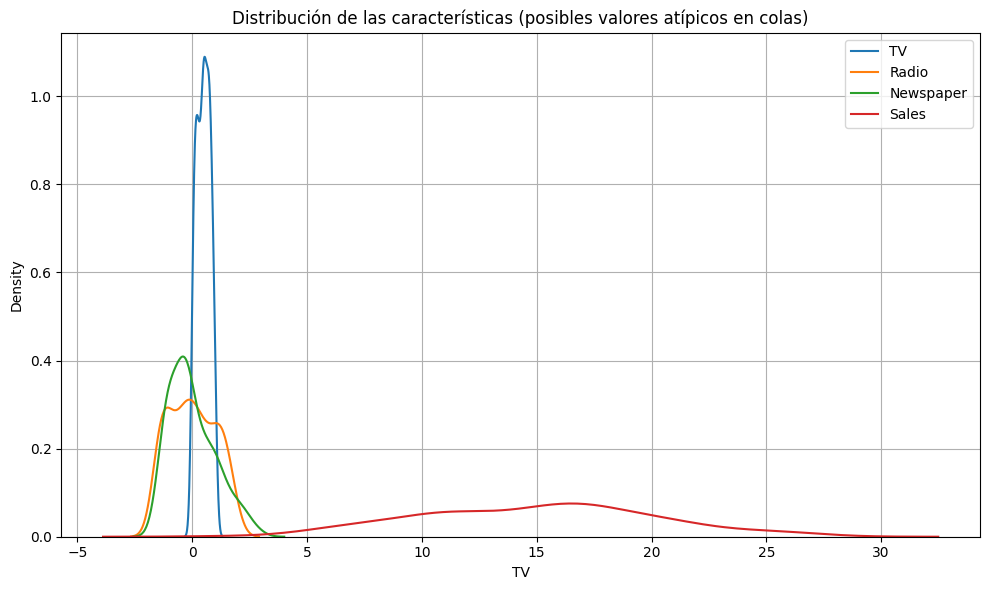

In [ ]:
plt.figure(figsize=(10, 6))
for col in ['TV', 'Radio', 'Newspaper', 'Sales']:
    sns.kdeplot(trainTdf[col], label=col)
plt.legend()
plt.title("Distribución de las características (posibles valores atípicos en colas)")
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
grado = 5

model_predictions = {}
residuals = {}
r2_scores = {}
models = {}
features = ['TV', 'Radio', 'Newspaper']

for feature in features:
    # Crear el modelo polinómico con el grado variable
    model = make_pipeline(PolynomialFeatures(grado), LinearRegression())

    # Entrenar el modelo con la característica correspondiente
    model.fit(trainTdf[[feature]], trainTdf['Sales'])

    # Almacenar el modelo
    models[feature] = model

    # Generar predicciones para la característica
    predictions = model.predict(trainTdf[[feature]])

    # Almacenar las predicciones en el diccionario
    model_predictions[feature] = predictions

    # Guardar las predicciones como una nueva columna en el DataFrame
    trainTdf[f'{feature}polynomialModel'] = predictions

    # Calcular y almacenar los residuos (diferencia entre predicciones y valores reales)
    residuals[feature] = trainTdf['Sales'] - predictions

    # Calcular y almacenar el R²
    r2_scores[feature] = r2_score(trainTdf['Sales'], predictions)

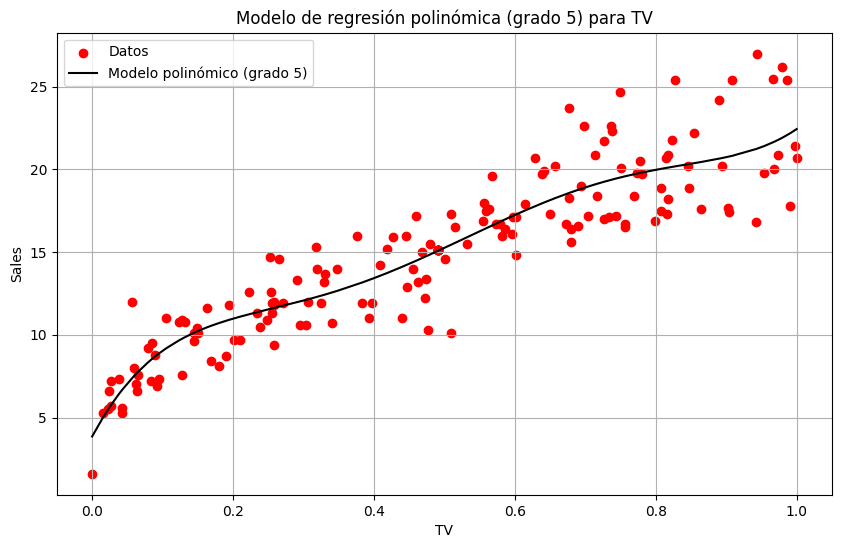

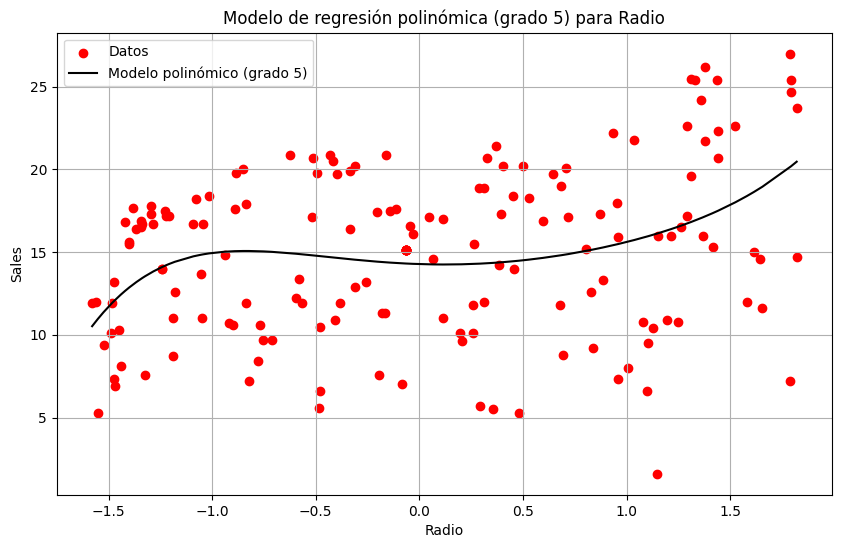

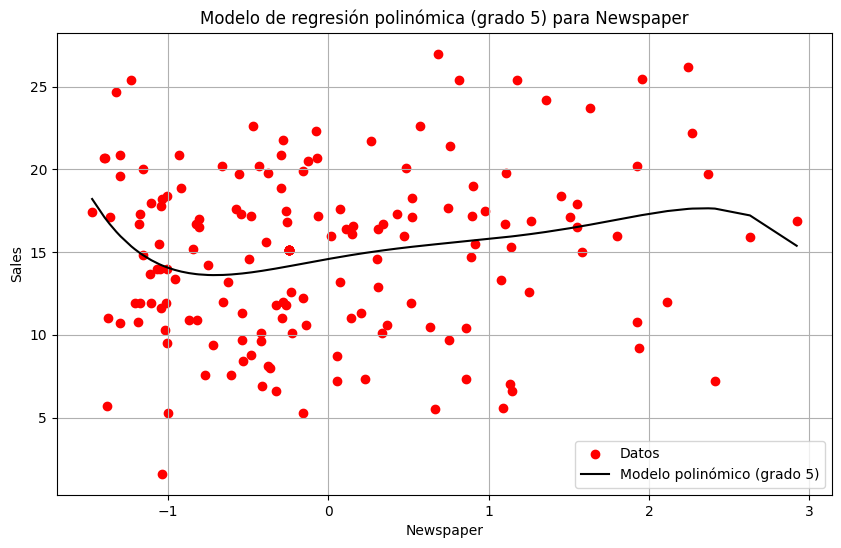

In [ ]:
for feature in ['TV', 'Radio', 'Newspaper']:
    plt.figure(figsize=(10, 6))
    plt.scatter(trainTdf[feature], trainTdf['Sales'], color='red', label='Datos')
    sorted_indices = np.argsort(trainTdf[feature])
    plt.plot(trainTdf[feature].iloc[sorted_indices], model_predictions[feature][sorted_indices], color='black', label=f'Modelo polinómico (grado {grado})')
    plt.title(f'Modelo de regresión polinómica (grado {grado}) para {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

* El modelo de regresión polinomica es el modelo que mejor permite ajustarse a los datos, evitando un posible subajuste o sobreajuste en los datos y que las predicciones se vean comprometidas.

* Un modelo de regresión lineal simple, puede ser eficiente a la hora de ver claramente la tendencia de los datos, no obstante, al no ajustarse suficientemente a los datos, hace que las predicciones que se vayan a realizar, carezcan de exactitud.

* Un modelo como KNN, puede ser ideal, no obstante, seria parecido a usar un modelo polinomico con un grado muy alto, lo unico que generaría es un sobreajuste a los datos y que las predicciones del modelo carezcan de sentido y que directamente, el modelo se dañe.

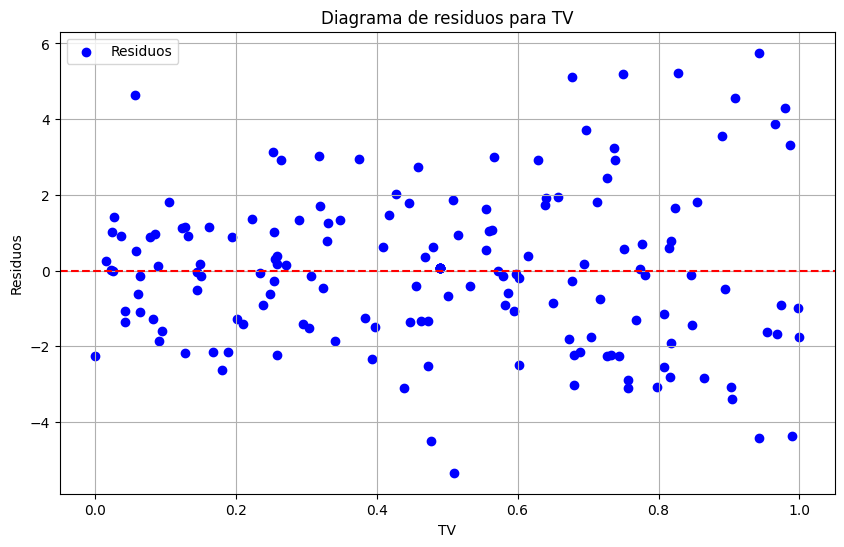

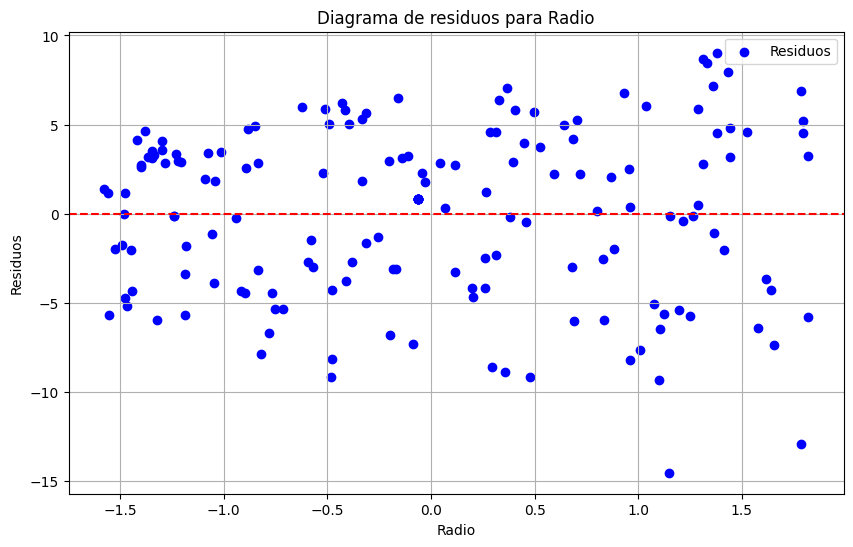

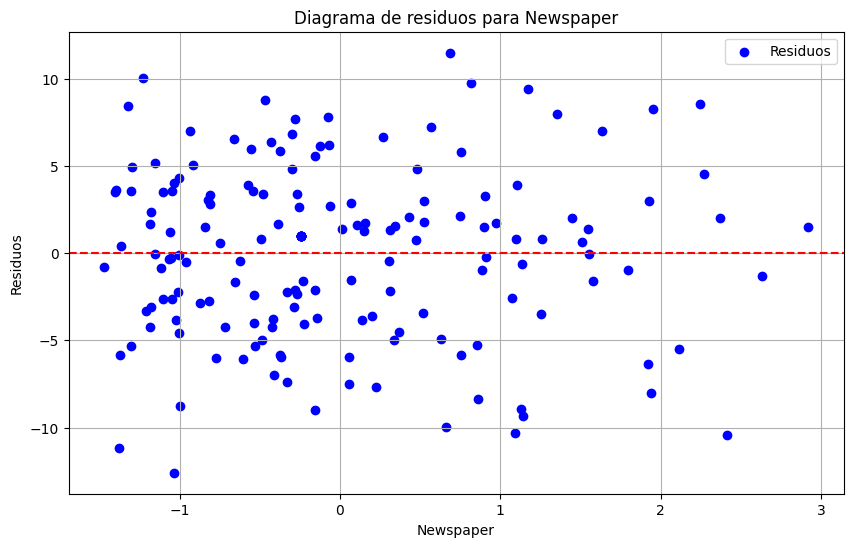

In [ ]:
for feature in ['TV', 'Radio', 'Newspaper']:
    plt.figure(figsize=(10, 6))
    plt.scatter(trainTdf[feature], residuals[feature], color='blue', label='Residuos')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Diagrama de residuos para {feature}')
    plt.xlabel(feature)
    plt.ylabel('Residuos')
    plt.legend()
    plt.grid(True)
    plt.show()

* Al revisar los graficos de residuos, se puede identificar una clara Homocedasticidad e independencia.

* La homocedasticidad nos indica que los residuales no poseen ningun tipo de patron, es decir, son valores totalmente aleatorios. Esto indica que los valores no tienen covarianza constante y hace que los datos sean de calidad y se pueda implementar un modelo adecuado para generar predicciones de calidad.

* Por otra parte, la independencia de los datos indica que los errors no estan correlacionados, afirmando y aprovando la homocedasticidad e indicando que el modelo es valido y fiable.

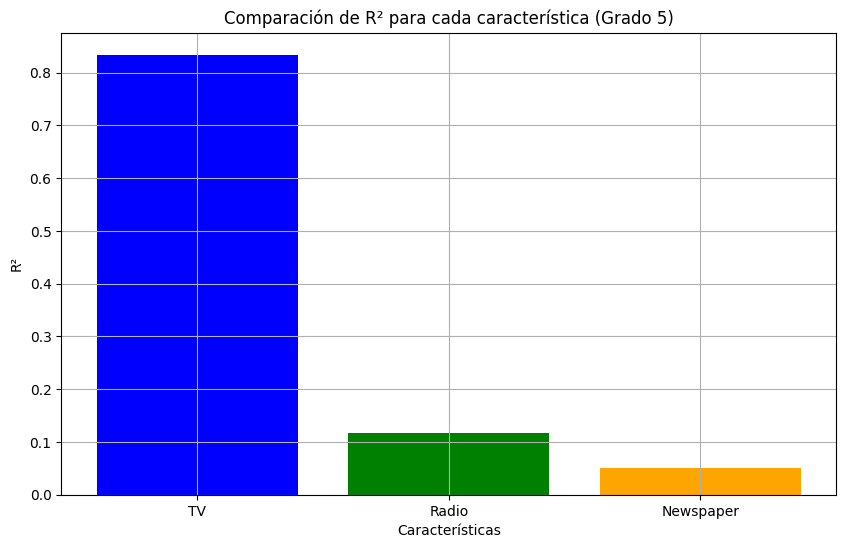

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue', 'green', 'orange'])
plt.title(f'Comparación de R² para cada característica (Grado {grado})')
plt.xlabel('Características')
plt.ylabel('R²')
plt.grid(True)
plt.show()

* R² examina como las diferencias de la variable dependiente, pueden ser explicadas a partir de una o más variables independientes.

* **TV** posee el valor de R² más cercano a 1, esto indica que el modelo tiene un muy buena ajuste a los datos. Puede indicar que es la mejor característica y que se viable de utilizar para predecir posibles ventas en un futuro. Puede explicar una posible teoria, en cuanto a que casi todas las personas poseen un televisor en sus casas, y al invertir en este medio, es más posible que alguien se entere de la publicidad por television y que llegue a comprar el producto.

* **Newspaper** posee el valor de R² más cercano a 0, esto indica que no se estan ajustando de manera correcta el modelo a los datos. Puede ser error del modelo, como tambien puede ser error de la propia característica, debido a que necesita ayuda de más variables para mejorar la explicación de las ventas. Esto puede indicar, que **Newspaper** no es la mejor característica para invertir, puede ser por el auge de la tecnología, y que en la actualidad muy poca gente realmente lee un periodico.

* **Radio** es un intermedio entre ambos, está más cerca del 0 que del 1, lo que indica que tiene no tiene un buan ajuste a los datos. No es ni la mejor característica pero a su vez, tampoco es la peor. Aun asi, teniendo un valor tan cercano a 0, no se pueden sacar conclusiones de la variable dependiente usando esta variable, ni tampoco del modelo.

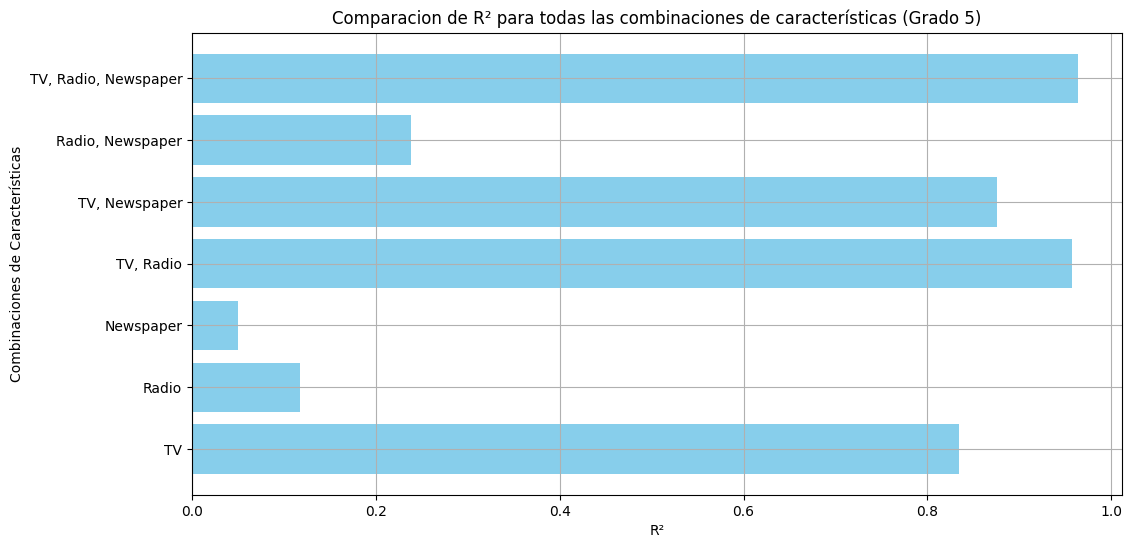

In [ ]:
r2_scores_combination = {}

for r in range(1, len(features) + 1):
    for combination in itertools.combinations(features, r):
        combination_list = list(combination)

        # Crear el modelo polinómico para la combinación actual
        model = make_pipeline(PolynomialFeatures(grado), LinearRegression())

        # Entrenar el modelo con la combinación de características
        model.fit(trainTdf[combination_list], trainTdf['Sales'])

        # Generar predicciones para el modelo
        predictions = model.predict(trainTdf[combination_list])

        # Calcular el R^2 para esta combinación y almacenarlo
        r2 = r2_score(trainTdf['Sales'], predictions)
        r2_scores_combination[', '.join(combination_list)] = r2

plt.figure(figsize=(12, 6))
plt.barh(list(r2_scores_combination.keys()), list(r2_scores_combination.values()), color='skyblue')
plt.title(f'Comparacion de R² para todas las combinaciones de características (Grado {grado})')
plt.xlabel('R²')
plt.ylabel('Combinaciones de Características')
plt.grid(True)
plt.show()

* Pese a que **TV** y **Radio** poseen una covarianza negativa, estas relación posee el R² más baja en comparación a las otras relaciones, esto puede indiciar que utilizar ambas caracteristicas para hacer la inversion no puede ser buena idea, no obstante, estas explican de manera acertada la variable dependiente y el modelo de regresion. Estas variables independientes pueden ser las mejores opciones para describir como pueden ir las ventas y una posible predicción que se realice.

* La mejor de todas, es la combinacion de las 3, esto puede entenderse como una totalidad, es decir, quien mejor que todas las variables independientes para explicar, tanto el modelo como la variable dependiente. Se pueden tener en cuenta para hacer predicciones, no obstante, es mejor elegir 1 o maximo 2 caracteristicas para poder realizar predicciones y a la larga, se necesita saber que caracteristica es mejor y por cual vale la pena hacer más inversion.

In [ ]:
n_neighbors = 5

# Diccionarios para almacenar los resultados del modelo KNN
knn_predictions = {}
knn_residuals = {}
knn_r2_scores = {}
knn_models = {}
features = ['TV', 'Radio', 'Newspaper']

for feature in features:
    # Crear el modelo KNN con un número fijo de vecinos
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Entrenar el modelo con la característica correspondiente
    knn_model.fit(trainTdf[[feature]], trainTdf['Sales'])

    # Almacenar el modelo en el diccionario
    knn_models[feature] = knn_model

    # Generar predicciones para la característica
    predictions_knn = knn_model.predict(trainTdf[[feature]])

    # Almacenar las predicciones en el diccionario
    knn_predictions[feature] = predictions_knn

    # Guardar las predicciones como una nueva columna en el DataFrame
    trainTdf[f'{feature}KNNModel'] = predictions_knn

    # Calcular y almacenar los residuos (diferencia entre predicciones y valores reales)
    knn_residuals[feature] = trainTdf['Sales'] - predictions_knn

    # Calcular y almacenar el R² para KNN
    knn_r2_scores[feature] = r2_score(trainTdf['Sales'], predictions_knn)

# Imprimir los R² de KNN
print(knn_r2_scores)

{'TV': 0.846961236337427, 'Radio': 0.38339225846112956, 'Newspaper': 0.14670716469330747}


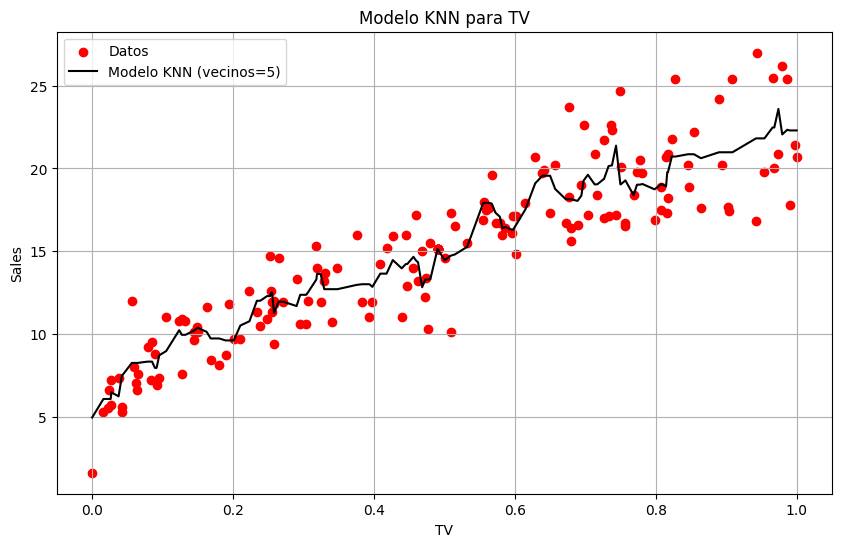

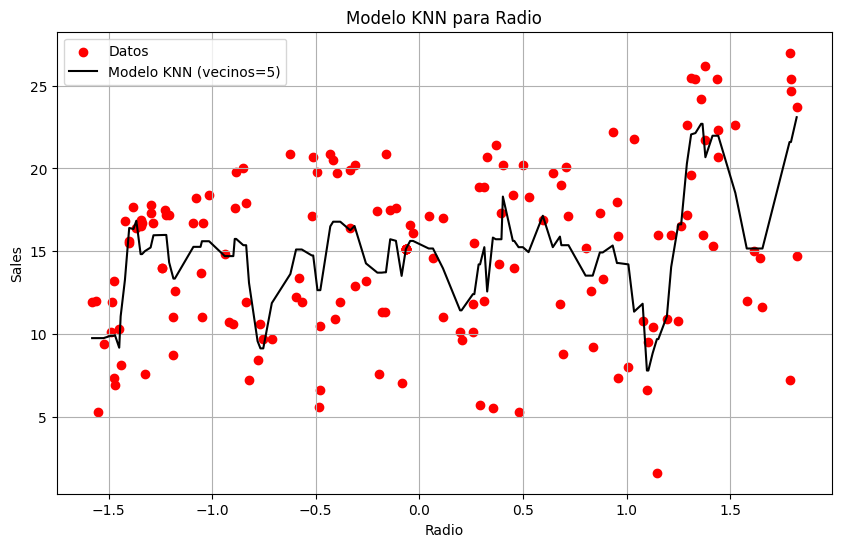

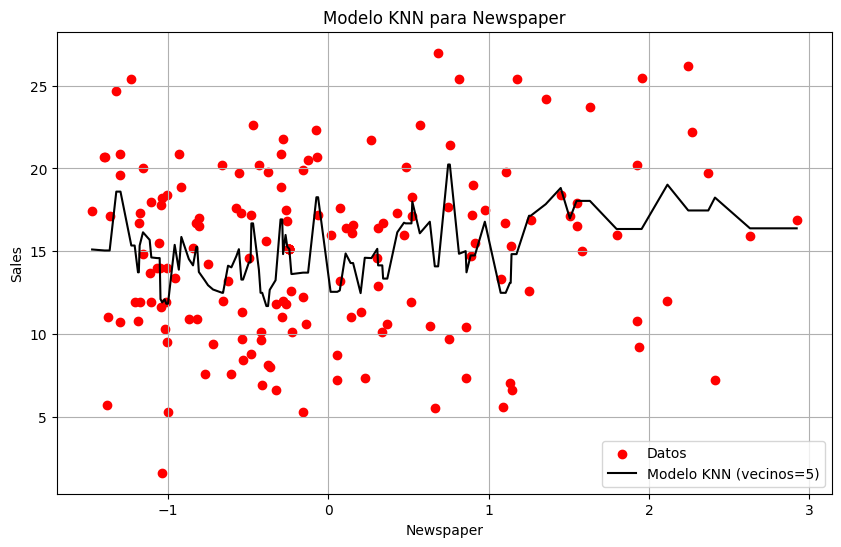

In [ ]:
for feature in ['TV', 'Radio', 'Newspaper']:
    plt.figure(figsize=(10, 6))
    plt.scatter(trainTdf[feature], trainTdf['Sales'], color='red', label='Datos')
    sorted_indices = np.argsort(trainTdf[feature])  # Ordenamos para la línea de predicción
    plt.plot(trainTdf[feature].iloc[sorted_indices], knn_predictions[feature][sorted_indices], color='black', label=f'Modelo KNN (vecinos={n_neighbors})')
    plt.title(f'Modelo KNN para {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()


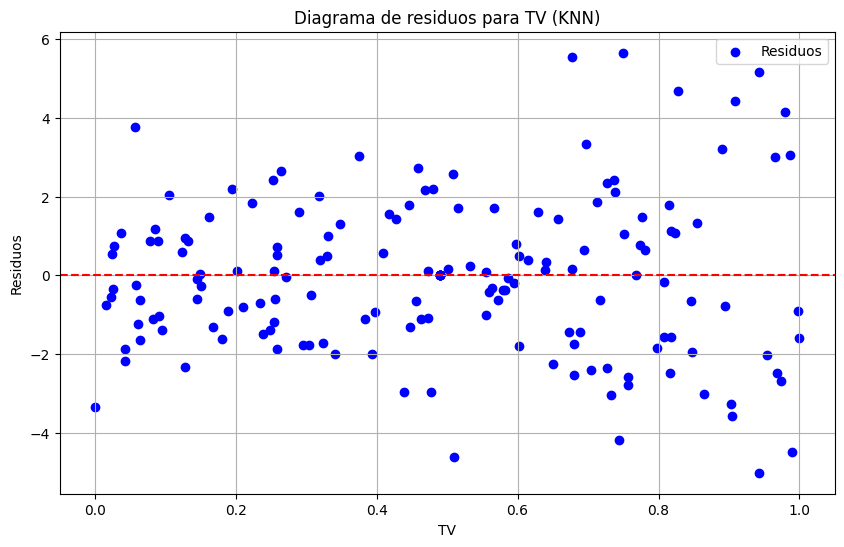

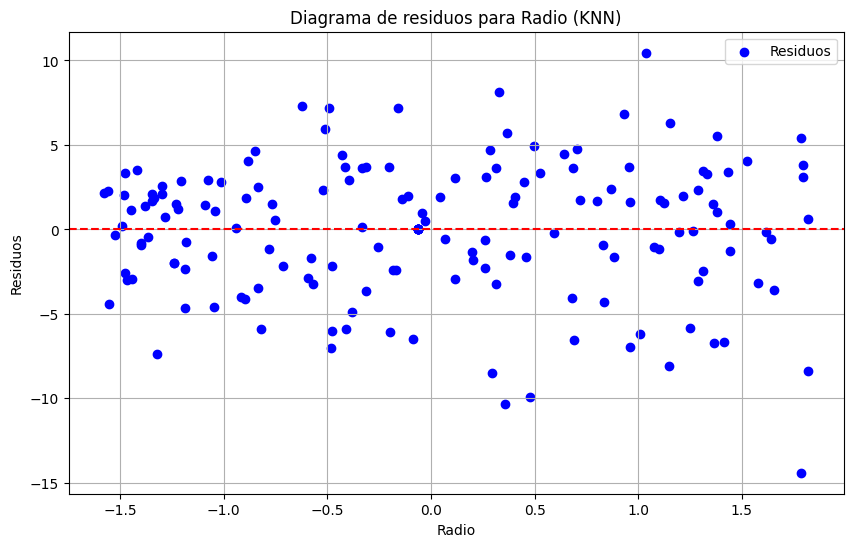

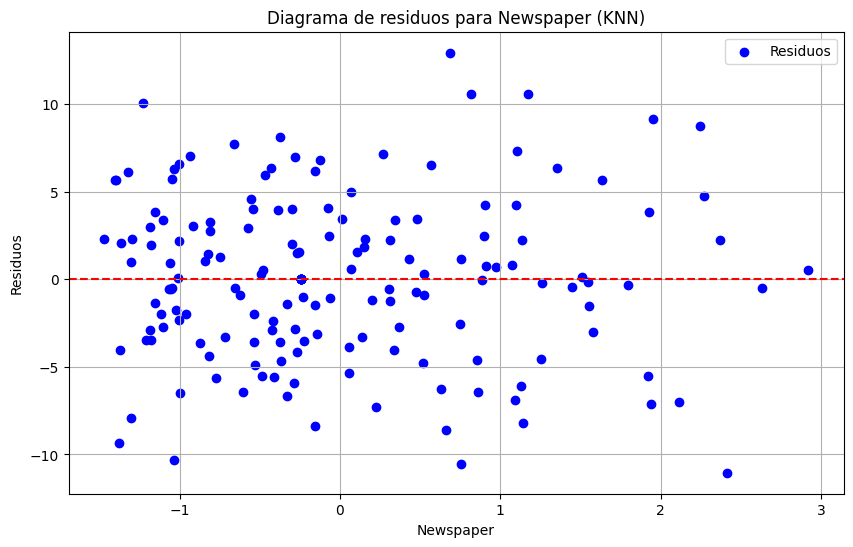

In [ ]:
for feature in ['TV', 'Radio', 'Newspaper']:
    plt.figure(figsize=(10, 6))
    plt.scatter(trainTdf[feature], knn_residuals[feature], color='blue', label='Residuos')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Diagrama de residuos para {feature} (KNN)')
    plt.xlabel(feature)
    plt.ylabel('Residuos')
    plt.legend()
    plt.grid(True)
    plt.show()


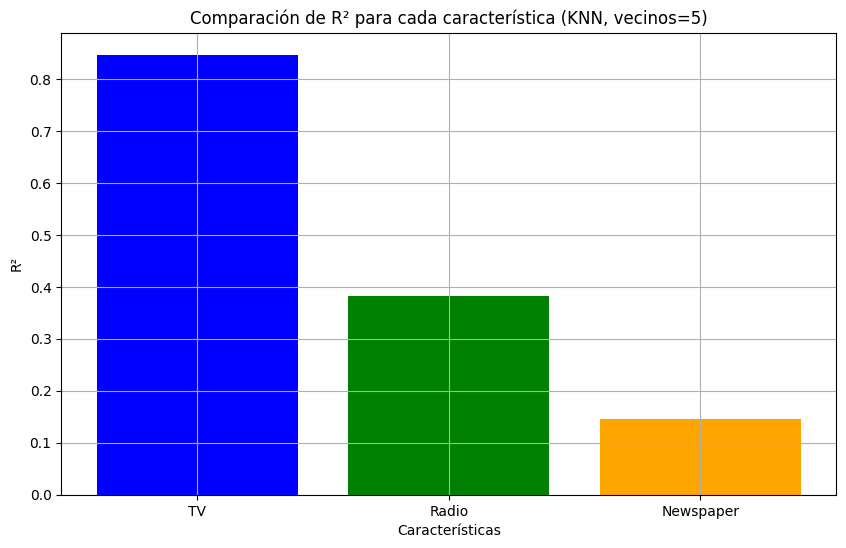

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(knn_r2_scores.keys(), knn_r2_scores.values(), color=['blue', 'green', 'orange'])
plt.title(f'Comparación de R² para cada característica (KNN, vecinos={n_neighbors})')
plt.xlabel('Características')
plt.ylabel('R²')
plt.grid(True)
plt.show()


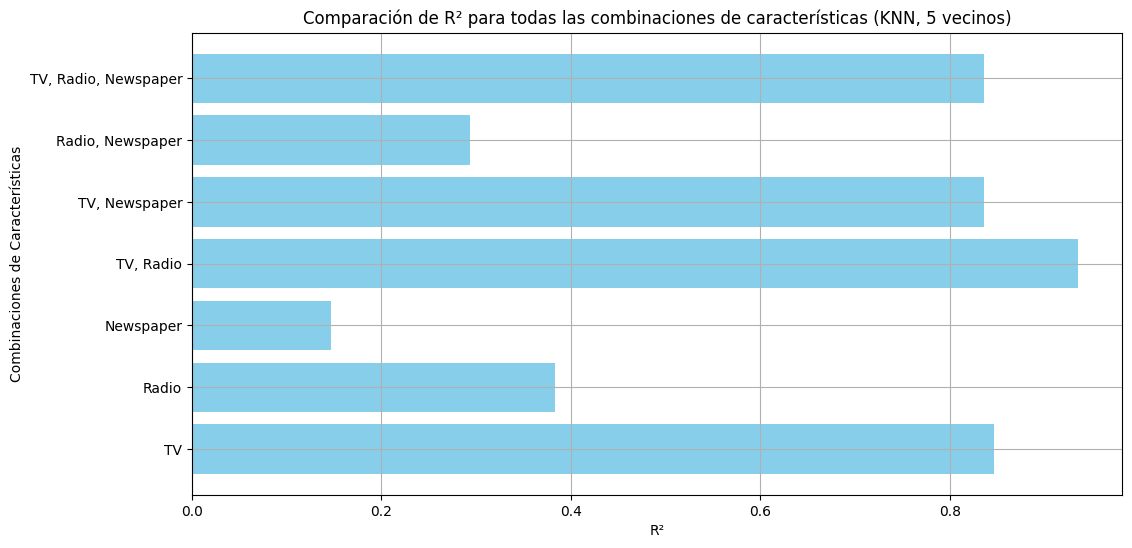

In [ ]:
r2_scores_knn_combination = {}

# Generar todas las combinaciones posibles de las características
for r in range(1, len(features) + 1):
    for combination in itertools.combinations(features, r):
        combination_list = list(combination)

        # Crear el modelo KNN para la combinación actual
        knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

        # Entrenar el modelo con la combinación de características
        knn_model.fit(trainTdf[combination_list], trainTdf['Sales'])

        # Generar predicciones para el modelo
        predictions_knn = knn_model.predict(trainTdf[combination_list])

        # Calcular el R² para esta combinación y almacenarlo
        r2_knn = r2_score(trainTdf['Sales'], predictions_knn)
        r2_scores_knn_combination[', '.join(combination_list)] = r2_knn

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.barh(list(r2_scores_knn_combination.keys()), list(r2_scores_knn_combination.values()), color='skyblue')
plt.title(f'Comparación de R² para todas las combinaciones de características (KNN, {n_neighbors} vecinos)')
plt.xlabel('R²')
plt.ylabel('Combinaciones de Características')
plt.grid(True)
plt.show()

In [ ]:
trainTdf

,TV,Radio,Newspaper,Sales,TVpolynomialModel,RadiopolynomialModel,NewspaperpolynomialModel,TVKNNModel,RadioKNNModel,NewspaperKNNModel
0,0.726528,1.380209,0.269159,21.7,19.255543,17.168979,15.009401,19.36,20.6800,14.58
1,0.303858,-0.897855,0.367957,10.6,12.115243,15.056068,15.141320,12.36,14.7000,13.34
2,0.864117,-0.113265,0.071562,17.6,20.450306,14.345370,14.706870,20.62,15.6261,12.62
3,0.439399,-1.186915,0.139161,11.0,14.101864,14.385411,14.815981,13.96,13.3400,14.28
4,0.847047,0.285912,-0.297631,18.9,20.327066,14.301152,14.057717,20.86,14.2000,16.92
...,...,...,...,...,...,...,...,...,...,...
159,0.061796,-0.085736,1.132343,7.0,7.613882,14.325559,15.937720,8.24,13.5044,13.08
160,0.082963,-0.822149,0.055962,7.2,8.466352,15.069678,14.680941,8.32,13.0800,12.54
161,0.555138,0.595619,1.262341,16.9,16.367256,14.651434,16.094150,17.92,17.1400,17.14
162,0.578696,-1.042385,0.341957,16.7,16.835416,14.869436,15.107846,17.08,15.6000,13.34


## Evaluación de desempeño

In [ ]:
# testT = test.copy()
# testTdf = testT.fillna(testT.median())
testT = pipelineGod.fit_transform(test)
testTdf = pd.DataFrame(testT, columns=test.columns)

test_r2_scores = {}
test_residuals = {}

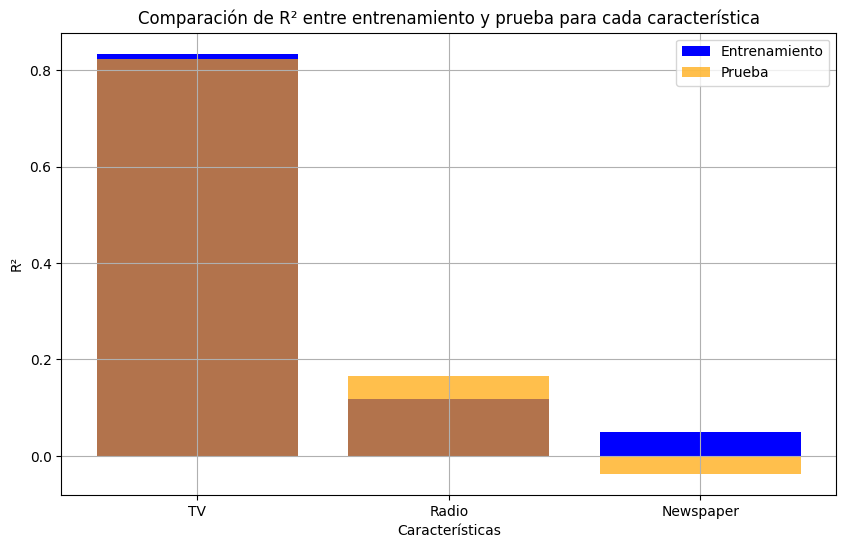

In [ ]:
for feature in features:
    # Obtener el modelo entrenado
    model = models[feature]

    # Predecir sobre el conjunto de prueba
    predictions_test = model.predict(testTdf[[feature]])

    # Calcular el coeficiente de determinación R^2 en el conjunto de prueba
    test_r2_scores[feature] = r2_score(testTdf['Sales'], predictions_test)

    # Calcular los residuos para el conjunto de prueba
    test_residuals[feature] = testTdf['Sales'] - predictions_test

# Comparar coeficientes de determinación (R^2) en un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(r2_scores.keys(), r2_scores.values(), color='blue', label='Entrenamiento')
plt.bar(test_r2_scores.keys(), test_r2_scores.values(), color='orange', alpha=0.7, label='Prueba')
plt.title('Comparación de R² entre entrenamiento y prueba para cada característica')
plt.xlabel('Características')
plt.ylabel('R²')
plt.legend()
plt.grid(True)
plt.show()

* Los datos de prueba son de cierta manera cercanos a los datos de entrenamiento, exceptuando **Newspaper**, esta característica posee un valor de R² negativo, esto indica que el modelo directamente no se ajusta correctamente a los datos o que los outliers son un limitante para que el modelo se pueda ajustar a los datos. Puede ser tambien, el hecho de que directamente el modelo no es el mejor para que se ajuste a este dato, no obstante, en los datos de entrenamiento, al tener el menor R², puede ser por esto que tampoco se ajuste efectivamente a los datos.

* **TV** posee el R² más alto en comparación a las otras caracterísitcas. Esto indica que como se veia viendo a lo largo de los analisis, es el mejor para poder describir tanto el modelo como su relación frente a la variable dependiente.

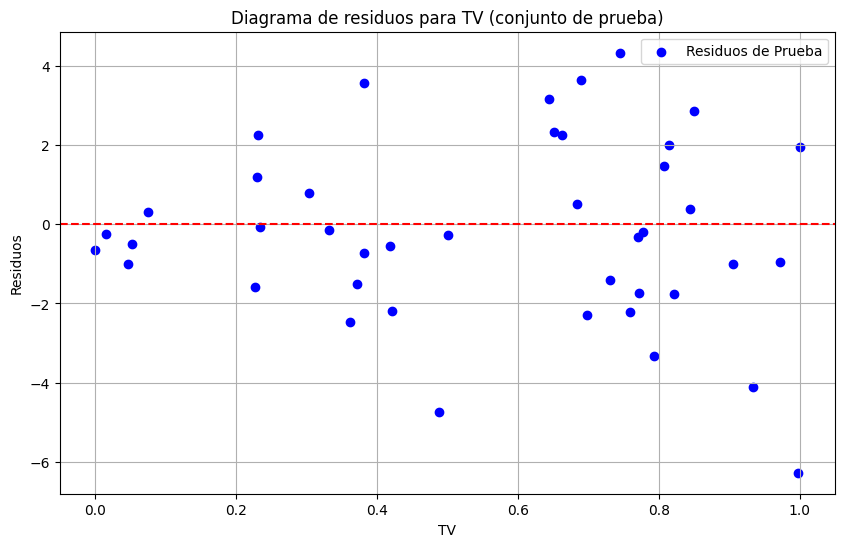

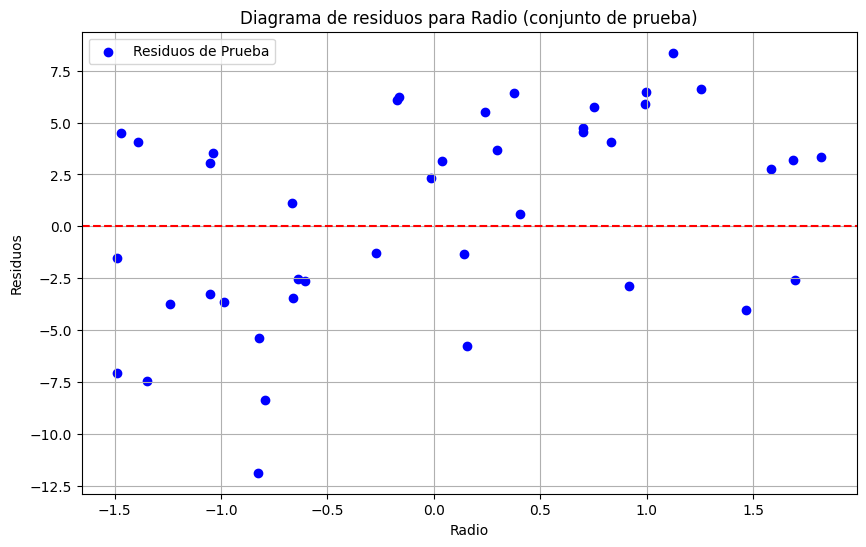

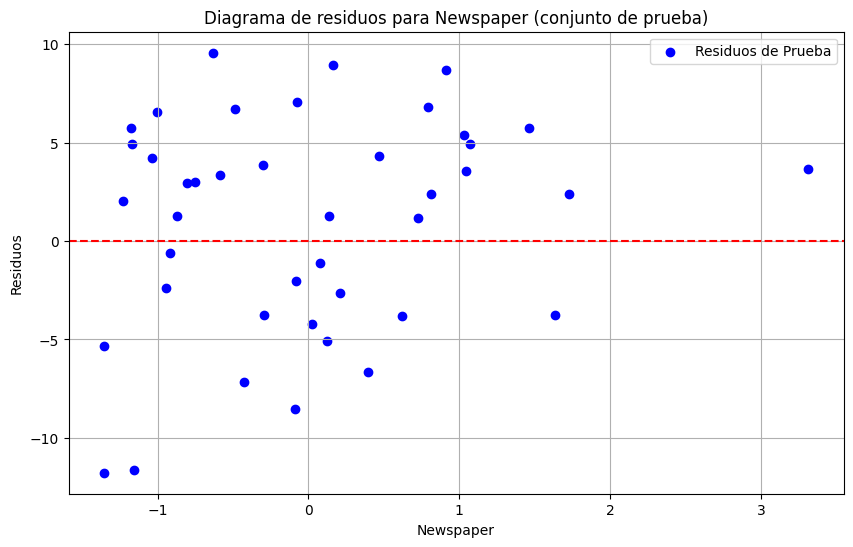

In [ ]:
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(testTdf[feature], test_residuals[feature], color='blue', label='Residuos de Prueba')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Diagrama de residuos para {feature} (conjunto de prueba)')
    plt.xlabel(feature)
    plt.ylabel('Residuos')
    plt.legend()
    plt.grid(True)
    plt.show()

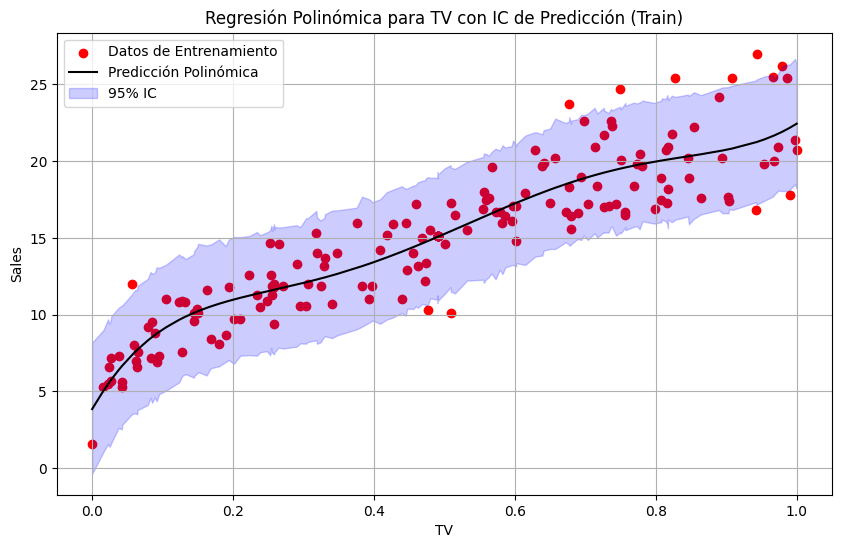

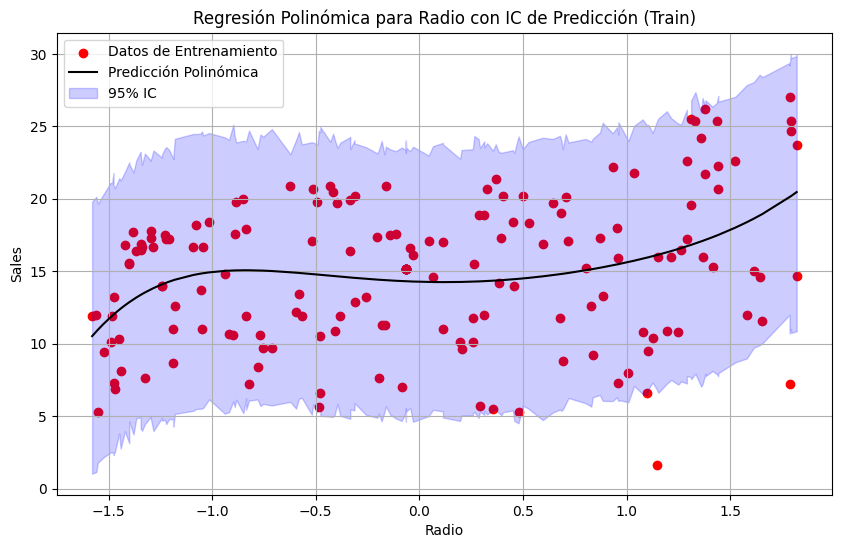

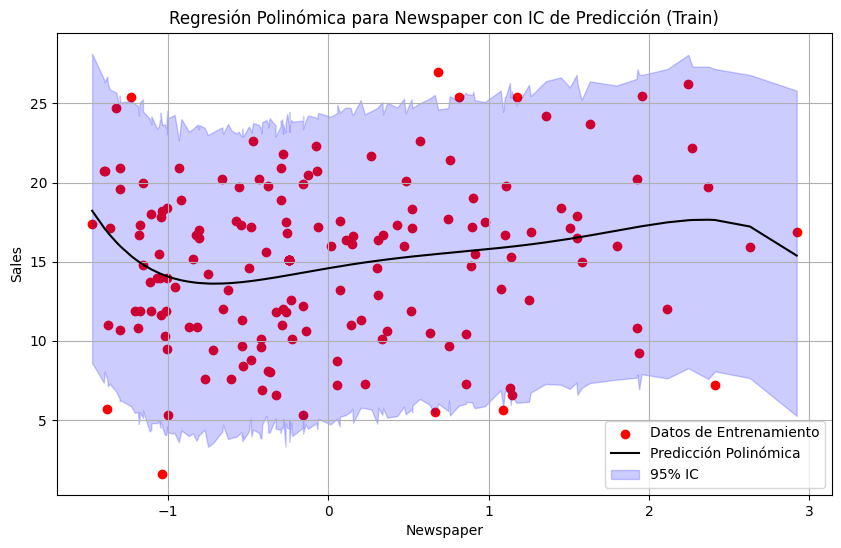

In [ ]:
preds_poly = {}

for feature in features:
    model = models[feature]  # Cargar el modelo polinómico existente
    X_train_feature = trainTdf[[feature]]

    # Realizar predicciones
    predictions_train = model.predict(X_train_feature)

    # Simular para obtener predicciones +/- desviación estándar
    num_simulaciones = 1000
    simulaciones = []
    for _ in range(num_simulaciones):
        # Generar ruido basado en los residuos
        noise = np.random.normal(loc=0, scale=residuals[feature].std(), size=len(X_train_feature))
        simulacion_pred = predictions_train + noise
        simulaciones.append(simulacion_pred)

    # Convertir las simulaciones en un array y obtener percentiles
    simulaciones = np.array(simulaciones)
    pred_lower = np.percentile(simulaciones, 2.5, axis=0)
    pred_upper = np.percentile(simulaciones, 97.5, axis=0)

    # Guardar resultados
    preds_poly[feature] = (predictions_train, pred_lower, pred_upper)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train_feature, trainTdf['Sales'], color='red', label='Datos de Entrenamiento')
    sorted_indices = np.argsort(X_train_feature[feature])
    plt.plot(X_train_feature.iloc[sorted_indices], predictions_train[sorted_indices], color='black', label='Predicción Polinómica')
    plt.fill_between(X_train_feature.iloc[sorted_indices][feature], pred_lower[sorted_indices], pred_upper[sorted_indices], color='blue', alpha=0.2, label='95% IC')
    plt.title(f'Regresión Polinómica para {feature} con IC de Predicción (Train)')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
test_r2_scores_knn = {}
test_residuals_knn = {}

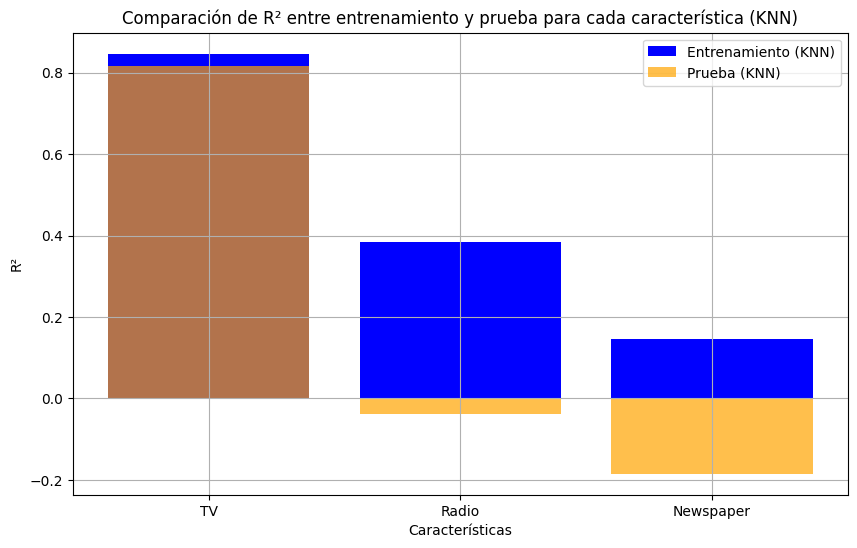

In [ ]:
for feature in features:
    # Obtener el modelo KNN entrenado para la característica
    knn_model = knn_models[feature]  # Usamos el modelo KNN entrenado antes

    # Predecir sobre el conjunto de prueba
    predictions_knn_test = knn_model.predict(testTdf[[feature]])

    # Calcular el coeficiente de determinación R² en el conjunto de prueba
    test_r2_scores_knn[feature] = r2_score(testTdf['Sales'], predictions_knn_test)

    # Calcular los residuos para el conjunto de prueba
    test_residuals_knn[feature] = testTdf['Sales'] - predictions_knn_test

# Comparar coeficientes de determinación (R²) en un gráfico de barras entre entrenamiento y prueba
plt.figure(figsize=(10, 6))
plt.bar(knn_r2_scores.keys(), knn_r2_scores.values(), color='blue', label='Entrenamiento (KNN)')
plt.bar(test_r2_scores_knn.keys(), test_r2_scores_knn.values(), color='orange', alpha=0.7, label='Prueba (KNN)')
plt.title('Comparación de R² entre entrenamiento y prueba para cada característica (KNN)')
plt.xlabel('Características')
plt.ylabel('R²')
plt.legend()
plt.grid(True)
plt.show()

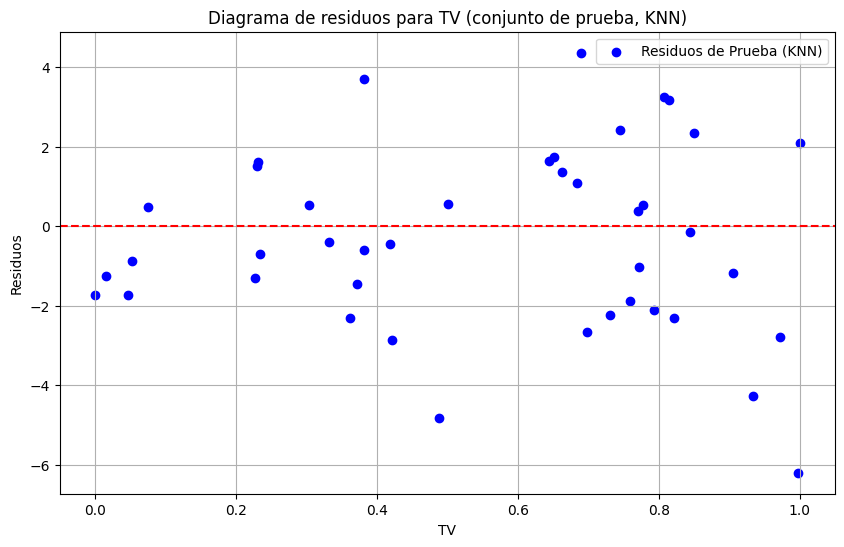

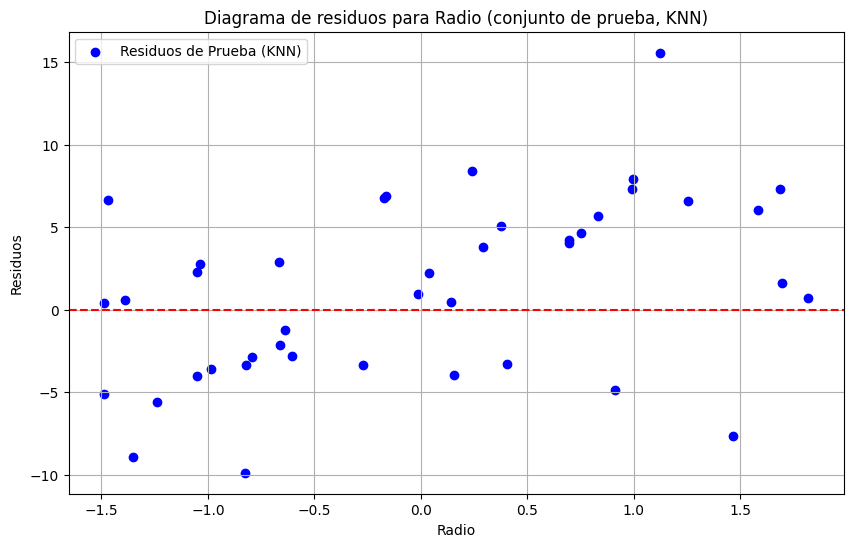

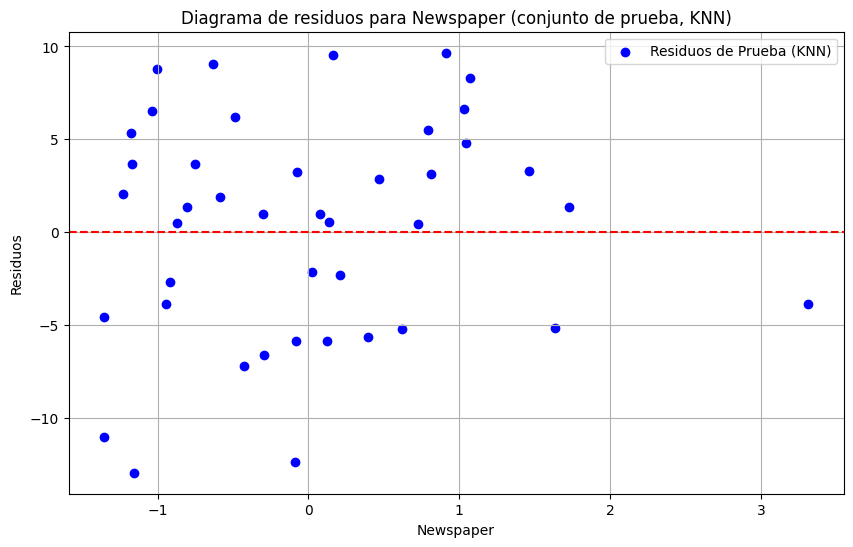

In [ ]:
for feature in features:
    plt.figure(figsize=(10, 6))

    # Usar los residuos del modelo KNN en el conjunto de prueba
    plt.scatter(testTdf[feature], test_residuals_knn[feature], color='blue', label='Residuos de Prueba (KNN)')

    # Añadir una línea horizontal en y=0 para referencia
    plt.axhline(y=0, color='red', linestyle='--')

    # Títulos y etiquetas
    plt.title(f'Diagrama de residuos para {feature} (conjunto de prueba, KNN)')
    plt.xlabel(feature)
    plt.ylabel('Residuos')
    plt.legend()
    plt.grid(True)

    # Mostrar el gráfico
    plt.show()


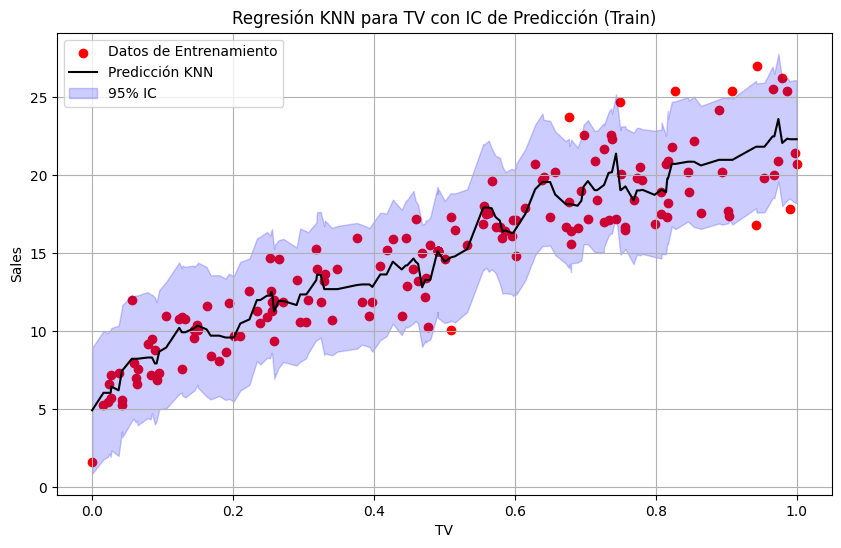

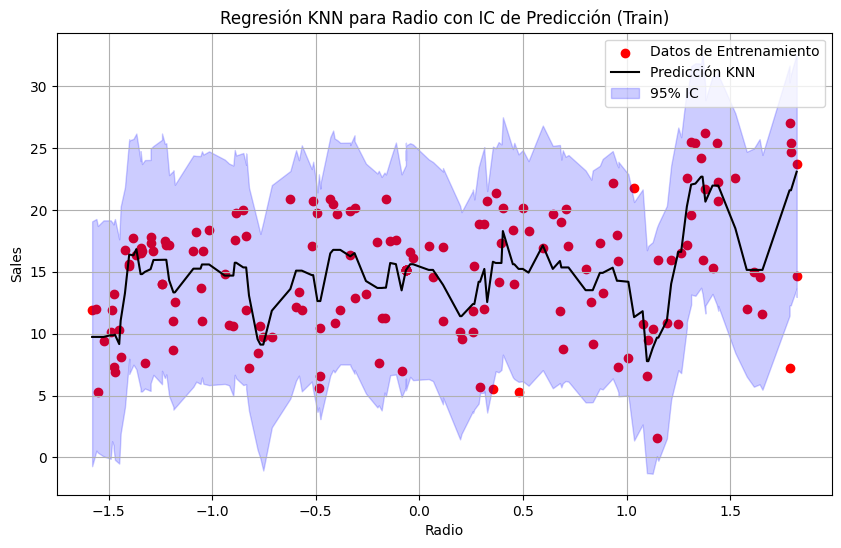

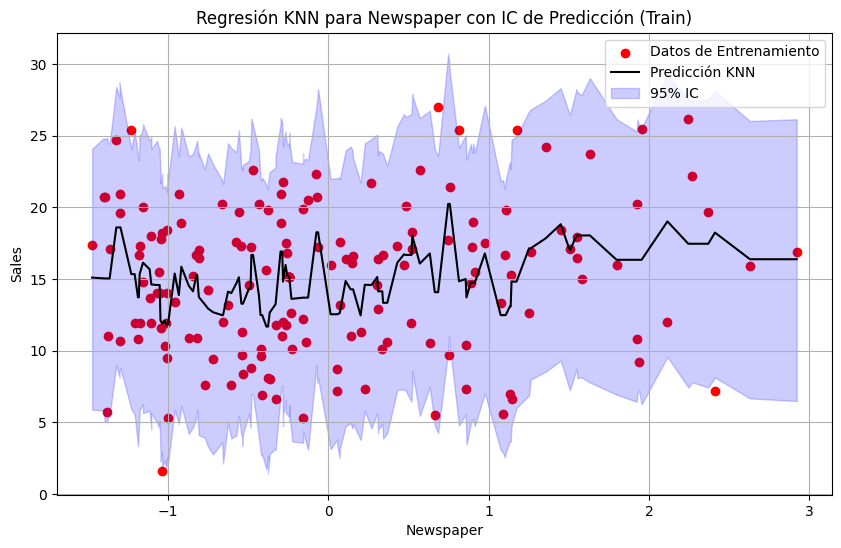

In [ ]:
# Diccionario para almacenar predicciones y los intervalos de confianza
preds_knn = {}

for feature in features:
    # Crear el modelo KNN
    model_knn = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Tomar el feature correspondiente
    X_train_feature = trainTdf[[feature]]
    y_train = trainTdf['Sales']

    # Entrenar el modelo KNN
    model_knn.fit(X_train_feature, y_train)

    # Realizar predicciones
    predictions_train = model_knn.predict(X_train_feature)

    # Simular para obtener predicciones +/- desviación estándar
    num_simulaciones = 1000
    simulaciones = []
    for _ in range(num_simulaciones):
        # Generar ruido basado en los residuos
        noise = np.random.normal(loc=0, scale=residuals[feature].std(), size=len(X_train_feature))
        simulacion_pred = predictions_train + noise
        simulaciones.append(simulacion_pred)

    # Convertir las simulaciones en un array y obtener percentiles
    simulaciones = np.array(simulaciones)
    pred_lower = np.percentile(simulaciones, 2.5, axis=0)
    pred_upper = np.percentile(simulaciones, 97.5, axis=0)

    # Guardar resultados
    preds_knn[feature] = (predictions_train, pred_lower, pred_upper)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.scatter(X_train_feature, y_train, color='red', label='Datos de Entrenamiento')

    # Ordenar los valores de las predicciones para una gráfica más suave
    sorted_indices = np.argsort(X_train_feature[feature])
    plt.plot(X_train_feature.iloc[sorted_indices], predictions_train[sorted_indices], color='black', label='Predicción KNN')

    # Dibujar el intervalo de confianza
    plt.fill_between(X_train_feature.iloc[sorted_indices][feature],
                     pred_lower[sorted_indices],
                     pred_upper[sorted_indices],
                     color='blue', alpha=0.2, label='95% IC')

    plt.title(f'Regresión KNN para {feature} con IC de Predicción (Train)')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()


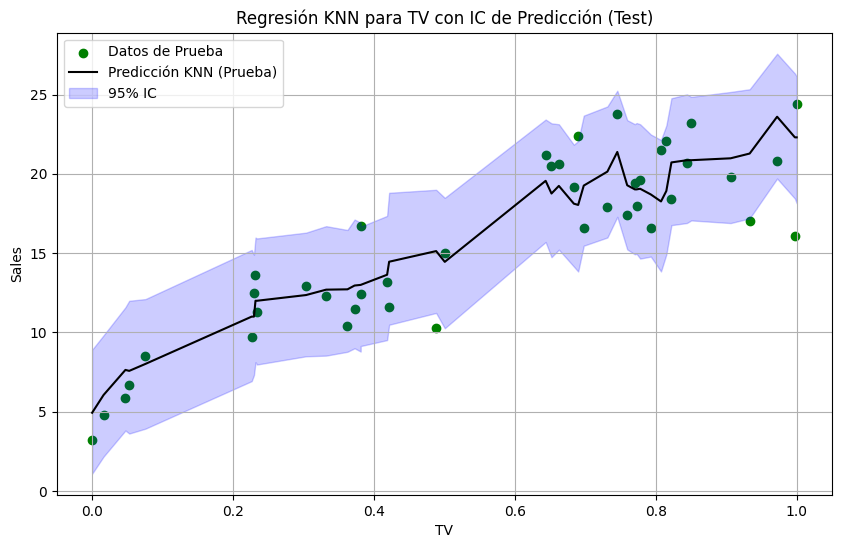

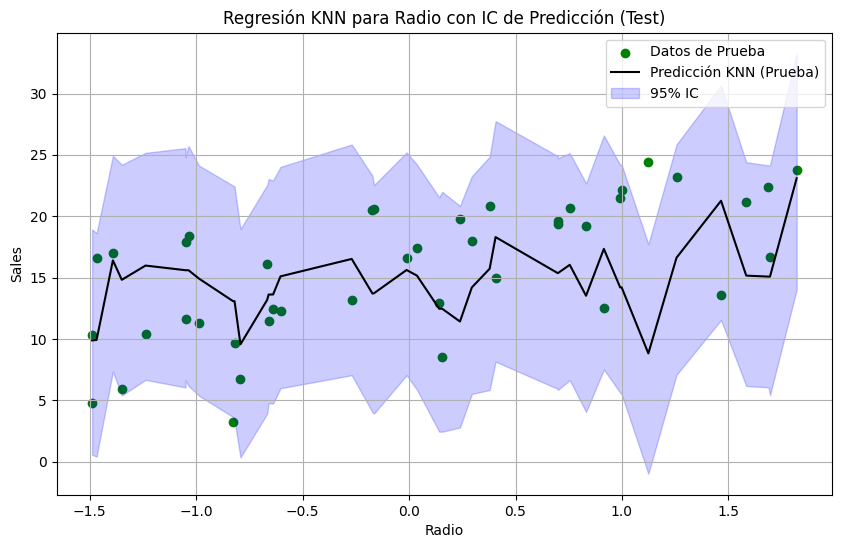

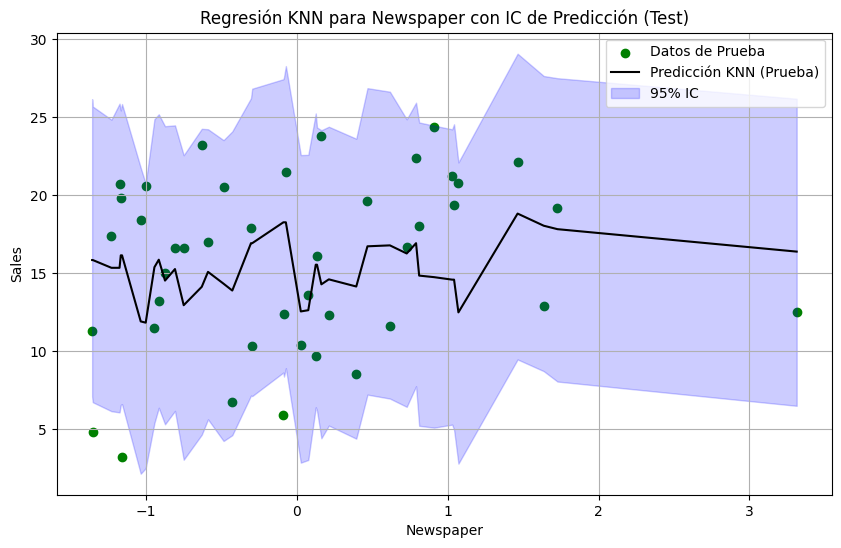

In [ ]:
# Diccionario para almacenar predicciones y los intervalos de confianza en el conjunto de prueba
preds_knn_test = {}

for feature in features:
    # Tomar el modelo KNN entrenado (usado en el conjunto de entrenamiento)
    model_knn = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Tomar la característica correspondiente del conjunto de prueba
    X_test_feature = testTdf[[feature]]
    y_test = testTdf['Sales']

    # Entrenar el modelo KNN (opcional, si ya tienes el modelo entrenado puedes omitir este paso)
    model_knn.fit(trainTdf[[feature]], trainTdf['Sales'])  # Puedes usar el modelo entrenado ya guardado en lugar de volver a entrenar.

    # Realizar predicciones en el conjunto de prueba
    predictions_test = model_knn.predict(X_test_feature)

    # Simular para obtener predicciones +/- desviación estándar
    num_simulaciones = 1000
    simulaciones = []
    for _ in range(num_simulaciones):
        # Generar ruido basado en los residuos del conjunto de entrenamiento
        noise = np.random.normal(loc=0, scale=residuals[feature].std(), size=len(X_test_feature))
        simulacion_pred = predictions_test + noise
        simulaciones.append(simulacion_pred)

    # Convertir las simulaciones en un array y obtener percentiles
    simulaciones = np.array(simulaciones)
    pred_lower = np.percentile(simulaciones, 2.5, axis=0)
    pred_upper = np.percentile(simulaciones, 97.5, axis=0)

    # Guardar los resultados
    preds_knn_test[feature] = (predictions_test, pred_lower, pred_upper)

    # Graficar
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_feature, y_test, color='green', label='Datos de Prueba')

    # Ordenar los valores de las predicciones para una gráfica más suave
    sorted_indices = np.argsort(X_test_feature[feature])
    plt.plot(X_test_feature.iloc[sorted_indices], predictions_test[sorted_indices], color='black', label='Predicción KNN (Prueba)')

    # Dibujar el intervalo de confianza
    plt.fill_between(X_test_feature.iloc[sorted_indices][feature],
                     pred_lower[sorted_indices],
                     pred_upper[sorted_indices],
                     color='blue', alpha=0.2, label='95% IC')

    plt.title(f'Regresión KNN para {feature} con IC de Predicción (Test)')
    plt.xlabel(feature)
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.show()


---

Relación entre variables independientes (características) frente a la variable dependiente (Sales)

* El indice de confianza del 95% indica en donde puede caer una predicción con respecto a los datos que ya estan y su ajuste con el modelo

* Si, el modelo se puede mejorar agregando relaciones no lineales, se evidencia claramente cuando se realiza el modelo de regresion polinomica, puesto que hay un mejor ajuste de los datos al modelo.

* Estas relaciones suelen ser menos simples, es decir, no necesariamente la relacion entre **TV** y **Radio** son aditivas o multiplicativas, puede que la relacion sea en la que ambas se refuercen entre si, cosa que un modelo lineal no capturaría bien.

* Relaciones como las que se van a recomendar, no se ajustarían bien con un modelo lineal.

---

## Selección del modelo

---

* En el estudio, se realizo analisis a 3 diferentes modelos de regresion; lineal (modificando el grado a 1), polinomial (modificando el grado siendo grado $<$1) y el modelo KNN.

* La idea principal del estudio es realizar un modelo predictivo el cual le pueda ayudar a la empresa a determinar la forma más eficaz de invertir el dinero en publicidad, haciendo que las ventas incrementen.

* Luego de analizar los diferentes modelos, y ver cual de estos puede realizar predicciones acertadamente con respecto al conjunto de datos suministrado fue el modelo de **regresion polinomial**

* Visualizando los graficos, sus curvas son mucho más suaves y siguen de mejor manera la tendencia de los datos.

* El intervalo de confianza es ligeramente más estrecho, lo que sugiere que el modelo tiene menos incertidumbre a la hora de hacer las predicciones.

* Lo importante, es poder ver una tendencia clara, quitando posibles outliers, y que a la hora de realizar una prediccion, sea lo más acertada posible para evitar una posible perdida de dinero en inversion.

* El modelo KNN muestra las predicciones de forma irregular y con menor suavidad, lo que indica que las predicciones no siguen una tendencia clara.

* El intervalo de confianza se ve más amplio y la linea de prediccion oscila bruscamente, indicando que el modelo es sensible a los vecinos, lo que puede ser un problema a la hora de captar la relacion entre variables y hacer predicciones, puesto que se guiara en los vecinos que tenga cerca y no en la tendencia de los datos.

---

* Los datos suministrados por la empresa son limitados, esto debido a que cuentan unicamente con 3 variables independientes y 2 de ellas no pueden explicar por si mismas a la variable dependiente.

* Al estar tratando con que metodo publicitario es mejor para poder invertir, se nota un claro ganador para esta pregunta (**TV**), no obstante, tener más variables que puedan explicar a la variable dependiente, o tener otras caracteristicas, como eventos que se hagan (black friday, descuentos, promociones), precios o ventas de la competencia o posibles problemas socioculturales (pandemias, subida o bajada del dolar) pueden ser ideales para poder generar una mejor prediccion y que esta sea mucho más acercada a la realidad, puesto que se pueden hacer predicciones con los datos actuales, sin embargo estas predicciones pueden variar con respecto a la estacionalidad en el año o cualquier otra característica mencionada anteriormente.

---

Parrafo de recomendación

* El modelo de regresión se ajusta correctamente a los datos, siendo el de regresión polinomica el que mejor se ajusta a los datos, establece un indice de confianza suavizado, lo que permite que se analice claramente la tendencia, y haga que se puedan realizar predicciones acertadas. El unicamente tener una variable independiente que realmente puede explicar por si sola a la variable dependiente no es lo mejor, debido a que no serviria mucho tener otras dos variables independientes en la tabla, si estas no explican correctamente a la variable dependiente y tampoco se ajustan bien al modelo. La tabla tiene buena cantidad de datos pero no buena cantidad de variables. Para poder hacer una predicción y que sea lo mas acertada posible, toca tener en cuenta patrones estacionales que pueden encontrarse en una poblacion, tener columnas que puedan estimar cuando las personas suelen comprar más, cuando las personas miran más cierto tipo de publicidad, eventos en donde se hagan promociones o la población objetivo, podria ayudar a realizar una prediccion mucho más acertada y poder establecer que publicidad es más efectiva y minimizar el rango de error para evitar perder dinero en una inversión que no de buenas ventas.

---


# 2. (Enfoque estadístico) Con el mismo conjunto de datos suministrado en el Punto 1, genere un modelo de regresión lineal utilizando el paquete statsmodels de Python [ https://www.statsmodels.org/stable/index.html ]. Tenga en cuenta que, parte de este ejercicio es documentarse sobre el funcionamiento básico de statsmodels.

In [ ]:
trainSm.head()

,TV,Radio,Newspaper,Sales
0,0.726528,1.380209,0.269159,21.7
1,0.303858,-0.897855,0.367957,10.6
2,0.864117,-0.113265,0.071562,17.6
3,0.439399,-1.186915,0.139161,11.0
4,0.847047,0.285912,-0.297631,18.9


In [ ]:
features = ['TV', 'Radio', 'Newspaper']
y = trainSm['Sales']

for feature in features:
    X = sm.add_constant(trainSm[feature])
    model = sm.OLS(y, X).fit()

    print(f"Resumen estadístico para el modelo usando {feature} como predictor:")
    print(model.summary())
    print("\n" + "-"*80 + "\n")

Resumen estadístico para el modelo usando TV como predictor:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     725.9
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           9.84e-62
Time:                        00:35:44   Log-Likelihood:                -358.94
No. Observations:                 164   AIC:                             721.9
Df Residuals:                     162   BIC:                             728.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

---

**TV**

Modelo con **TV** como predictor

  * const = 7.12, inversión = 0, promedio ventas aprox 7.12.
  * coeficiente 16.05, por cada incremento en inversion de **TV** las ventas aumentan 16.06, manteniendo constantes demas variables.
  * Significancia 0.000, altamente significativo y menor a 0.05 (La inversión de **TV** tiene un efecto estadisticamente significativo sobre las ventas), si elvalor fuera mayor a 0.05, indica que el impacto de la inversion no es estadisticamente significativo en el modelo.
  * Intervalo de confianza [14.881, 17.235], relación positiva consistente.

R-squared y Adjusted R-squared

  * 0.818, lo que significa que el 81.8% de la variabilidad en  las ventas es explicada por la inversion en **TV**
  * 0.816, muy cercani a R-squared, sugiere que el modelo es bastante robusto.

---

**Radio**

Modelo con **Radio** como predictor

  * const = 14.96, promedio de ventas aprox 14.97.
  * coeficiente 1.4, por cada incremento en inversión de **Radio** las ventas aumentan 1.4, manteniendo constantes las demas variables.
  * Significancia 0.000, altamente significativo y menor a 0.05 (La inversión de **Radio** tiene un efecto estadisticamente significativo sobre las ventas), si elvalor fuera mayor a 0.05, indica que el impacto de la inversion no es estadisticamente significativo en el modelo.
  * Intervalo de confianza [0.647, 2.154], impacto del radio es positivo y significativo.

R-squared y Adjusted R-squared

  * 0.077, lo que significa que el 7.7% de la variabilidad en las ventas es explicada por la inversion en **Radio**, el valor es bastante bajo, no explica mu bien las ventas.
  * 0.071, similar a R-squared, indica que **Radio** como predictor no contribuye demasiado a la explicación de la variabilidad en las ventas.

---

**Newspaper**

Modelo con **Newspaper** como predictor

  * const = 14.96, promedio de ventas 14.97.
  * coeficiente 0.68, por cada incremento en inversión de **Newspaper** las ventas aumentan 0.69.
  * Significancia 0.083, valor por encima del umbral (0.05), esto indica que el impacto de la inversión en **Newspaper** no es estadisticamente significativo para el modelo.
  * Intervalo de confianza [-0.090, 1.464], al incluir 0, refuerza la falta de significancia de este coeficiente, es decir, su impacto sobre las ventas no es concluyente

R-squared y Adjusted R-squared

  * 0.018, lo que significa que el 1.8% de la variabilidad en las ventas es explicada por la inversión en **Newspaper**.
  * 0.012, valor muy bajo, confirma que la inversion en **Newspaper** no es un buen predictor para las ventas en el modelo.

---

In [ ]:
X = trainSm[features]
X = sm.add_constant(X)
y = trainSm['Sales']

# Crear el modelo de regresión múltiple
modelo_multiple = sm.OLS(y, X).fit()

# Generar el resumen estadístico
print("Resumen estadístico para el modelo múltiple con todos los predictores:")
print(modelo_multiple.summary())


Resumen estadístico para el modelo múltiple con todos los predictores:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     470.2
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           4.24e-79
Time:                        00:35:44   Log-Likelihood:                -311.15
No. Observations:                 164   AIC:                             630.3
Df Residuals:                     160   BIC:                             642.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

---

**TV**

* 16.08 vs 16.06

**Radio**

* 1.4001 vs 1.4213

**Newspaper**

* 0.6874 vs  0.0435

* Indica que su efecto en sales no es significativo (por su valor de significancia de 0.746) cuando se incluyen otros predictores, es decir, esta característica no contribuye estadisticamente de manera significativa a las ventas.

---

AIC y BIC

* En el modelo multiple, estos valores son más bajos que en cualquier modelo simple, esto sugiere que no solo tiene un menor ajuste, sino que tambien es preferible en terminos de penalización por complejidad

---

Estadistico-F

Este estadístico prueba si el modelo completo (con todos los predictores), es mejor que un modelo sin predictores.

* Este valor dice que el conjunto de predictores explica de forma significativa la variabilidad de Sales, en comparación a un modelo que no utilice predictores, debido a que su valor es de 470.2 y cuenta con una significancia muy baja, lo que indica que el modelo es muy significativo.

* Este resultado dice que el modelo multiple es mejor para poder predecir las ventas, ya que al menos uno de todos los predictores que hay, tiene un efecto altamente significativo. Sin importar si hay predictores que no son significativos por si solos, al juntarlos, son estadísticamente utiles para explicar la variable dependiente.

---

---

**Ventajas vs Desventajas Modelo Simple**

---

**Ventajas**

* Cada modelo es facil de interpretar, ya que tiene un impacto aislado

* Se puede identificar que tanta importancia tiene, ver si es estadisticamente util u obsoleto y ver que predictor tiene el efecto más fuerte y puede explicar de mejor manera a la variable dependiente

**Desventajas**

* Solo explican una fracción de variabilidad de la variable dependiente, en casos donde R-squared sea muy bajos para la variable independiente (**Radio, Newspaper**), puede indicar que el modelo no captura de manera correcta la relación entre variable dependiente e independiente.

* Este modelo no permite observar como la inversión en un medio publicitario puede interactuar con otros medios para comparar su impacto en las ventas. Esto puede ser un limitante en cuando a precisión y relevancia de los modelos, especialmente en un modelo donde se espera que los medios se complementen los unos a los otros.

---

**Ventajas vs Desventajas Modelo Multiple**

---

**Ventajas**

* Al presentar un R-squared bastante alto (más alto en comparación a los modelos simples), indica que puede explicar en mayor proporcion la variabilidad de la variable dependiente.

* Al estar incluyendo todas las características en el modelo, se pueden tener en cuenta las relaciones entre estas, permitiendo capturar un panorama mas completo de como estas variables independientes afectan a la dependiente (**TV, Radio, Newspaper** afecta a **Sales**)

* Optimiza criterios como el AIC y BIC lo que indica que tiene un mejor balance entre ajuste y complejidad.

**Desventajas**

* Tiende a ser más compleja, debido a la cantidad de predictores que puedan haber, interpretar el impacto que tiene cada caracterisitica individualmente es más complicado, especialmente cuando hay variables que son muy poco significativas estadisticamente.


---

En resumen

**Modelo simple**

* Permite analizar de mejor manera y mas sencilla el impacto de cada predictor en el modelo e identificar cual tiene mayor impacto y más significativo a la hora de poder ver como afectan a las ventas.

* Al analizar individualmente las características, no se puede ver como estas interactuan entre si, limitando la presición y relevancia de los modelos, especialmente en este modelo, donde a priori, las tres características (**TV, Radio, Newspaper**) deberian de estar bastante relacionadas a la hora de ver como se desarrollan las ventas.

**Modelo múltiple**

* Explica en mayor proporcion la variabilidad de las ventas en el modelo.

* Al incluir todas las características, el modelo tiene en cuenta las posibles relaciones entre las variables, lo cual permite ver como las inversiones que se realicen en publicidad, afecten a las ventas.

* Es más dificil de ver como se desarrolla en el modelo cada variable individualmente, lo que dificultaria ver, si hay alguna variable que no sea significa estadisticamente, lo que hace que caracteristicas como **Newspaper** y **TV** (siendo la que menos y más pueden describir a **Sales**) se puedan confundir y generar pensamientos erroneos.

---



---

La empresa desea poder optimizar su inversión en publicidad, teniendo principalmente 3 opciones claras: **TV, Radio** y **Newspaper**, tanto como el modelo simple como el multiple poseen ventajas y desventajas, no obstante, un factor importante para tener en cuenta son las relaciones de estas variables y como se relacionan entre ellas para poder describir el comportamiento de **Sales**.

Es por esto que el modelo multiple puede ofrecer un balance entre la precisión y la capacidad predictiva.

Si bien es cierto, que no puede describir de manera sencilla a las variables independientes, es importante recalcar el como se relacionan estas variables y sobretodo a la hora de realizar predicciones y que estas sean muy acertadas.

Aparte, este modelo, permite cierta robustes en las predicciones, cosa que el modelo simple puede dar (si lo puede dar, pero no tan bien como el modelo multiple)

Por ultimo, este modelo explica mejor la variabilidad de las ventas (usando R-squared, ya que su valor es bastante alto), esto convierte a este modelo mucho mejor, en cuanto a la información que da y como esta información puede usarse para predecir el efecto de la inversión que vaya a realizar la empresa.

---